# 1. Testing if two graphs are isomorphic

Returns True if the graphs G1 and G2 are isomorphic and False otherwise

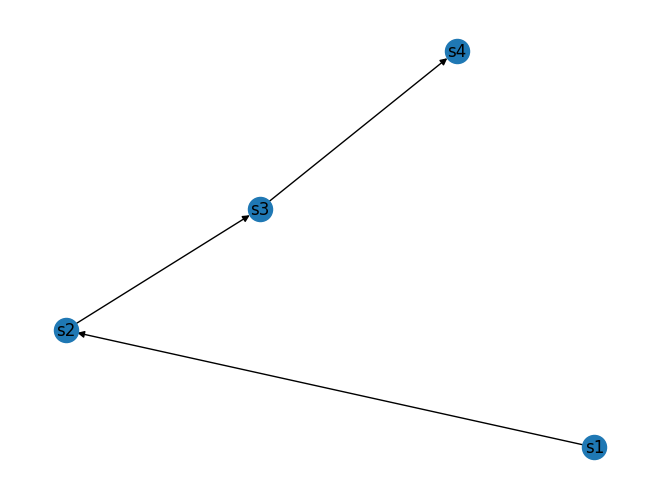

In [6]:
import networkx as nx

G1, G2 = nx.DiGraph(), nx.DiGraph()
G1.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s4")]) # G1: 1->2->3->4
G2.add_edges_from([("s1", "s2"), ("s2", "s3"), ("s3", "s7")]) # G2: 1->2->3->7

nx.draw(G1, with_labels = True)


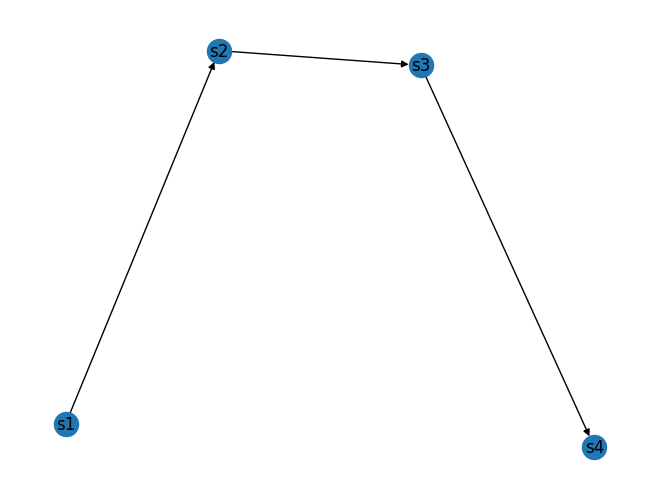

In [7]:
nx.draw(G1, with_labels = True)

In [8]:
nx.is_isomorphic(G1, G2)

True

## 1.1. Uses the VF2 Algorithm (An implementation of VF2 algorithm for graph ismorphism testing)



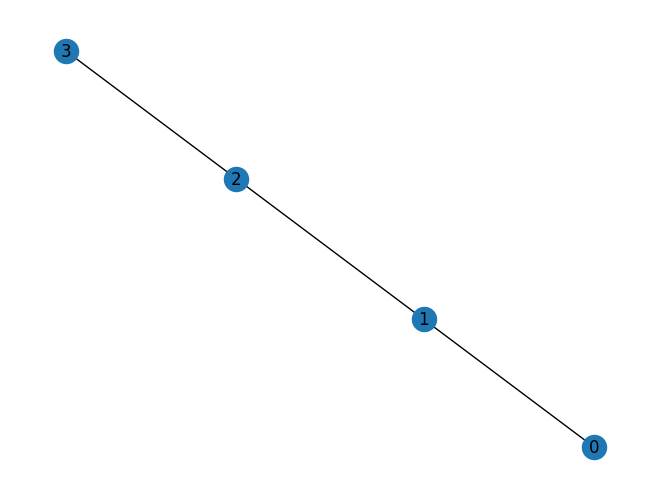

In [9]:
#Create graph G1 and G2
from networkx.algorithms import isomorphism
G1 = nx.path_graph(4)
G2 = nx.path_graph(4)

nx.draw(G1, with_labels = True)

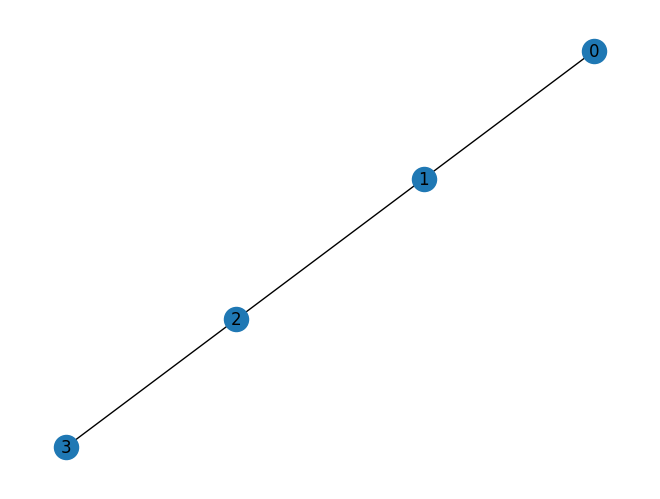

In [10]:
nx.draw(G2, with_labels = True)

In [11]:
GM = isomorphism.GraphMatcher(G1,G2)
GM.is_isomorphic()

True

In [12]:
GM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

## 1.2. Suppose G1 and G2 are isomorphic directed graphs. Verification is as follows:

In [13]:
#path_graph to generates a linearly connected graph with 4 nodes
G1 = nx.path_graph(4, create_using=nx.DiGraph())
G2 = nx.path_graph(4, create_using=nx.DiGraph())
#DiGraphMatcher class from isomorphism module to create a DiGraphMatcher object
DiGM = isomorphism.DiGraphMatcher(G1,G2)
DiGM.is_isomorphic()

True

### DiGM.mapping stores the isomorphism mapping from G1 to G2


In [14]:
DiGM.mapping

{0: 0, 1: 1, 2: 2, 3: 3}

## 1.3. Label attributes comparision: During comparison, node attributes are compared

By default, node attributes are a blank dictionary (and do not incorporate node label information)

A quick way to fix that is to use nx.convert_node_labels_to_integers and specify the key for label attributes:

In [15]:
'''
convert_node_labels_to_integers function is used to relabel the nodes of the graph with consecutive integers
'''
G1_int = nx.convert_node_labels_to_integers(G1, label_attribute='label')
G2_int = nx.convert_node_labels_to_integers(G2, label_attribute='label')
print(G1_int.nodes[0])

{'label': 0}


In [16]:
nx.is_isomorphic(G1_int, G2_int, node_match = lambda x,y: x==y)

True

## 1.4. Search for a subgraph of G2 that is isomorphic to G1. (Finding multiple subgraphs)

In [17]:
import networkx.algorithms.isomorphism as iso

G1 = nx.Graph()
G1.add_edges_from([(1,2)])

G2 = nx.Graph()
G2.add_edges_from([(1,2), (2,3), (3,4)])

# Search for a subgraph of G2 that is isomorphic to G1
GM = iso.GraphMatcher(G2,G1)
for mapping in GM.subgraph_isomorphisms_iter():
    print(mapping)


{1: 1, 2: 2}
{2: 1, 1: 2}
{2: 1, 3: 2}
{3: 1, 2: 2}
{3: 1, 4: 2}
{4: 1, 3: 2}


## 1.5. Using GraphMatcher to find a subgraph in Karate network

Modify the GraphMatcher class so that subgraph_is_isomorphic() will determine whether G2 is a subgraph (with
an identity isomorphism).

In [18]:
class GraphMatcher(nx.algorithms.isomorphism.GraphMatcher):
    def semantic_feasibility(self, G1_node, G2_node):
        return G1_node == G2_node

In [19]:
G = nx.karate_club_graph()

# Grab a subgraph
subG_good = G.subgraph(range(10))

    
# Make an isomorphic subgraph
subG_bad = nx.relabel_nodes(subG_good, dict(zip(range(10), 'abcdefghij')))

gm = GraphMatcher(G,subG_good)
gm.subgraph_is_isomorphic()


True

In [20]:
gm = GraphMatcher(G,subG_bad)
gm.subgraph_is_isomorphic()


False

# 2. gSpan method

In [1]:
# !pip install gspan-mining
# !pip install gspan
from gspan_mining.config import parser
from gspan_mining.main import main

In [22]:
%matplotlib inline

In [ ]:
#ATTENTION: DUE TO PANDAS 2.0 UPDATE, APPEND WAS REMOVED, WE NEED TO CHANGE APPEND TO CONCAT IN gspan.py IN THE LIBRARY gsapn-mining
self._report_df = self._report_df.append(
            pd.DataFrame(
                {
                    'support': [self._support],
                    'description': [display_str],
                    'num_vert': self._DFScode.get_num_vertices()
                },
                index=[int(repr(self._counter)[6:-1])]
            )
        )
        
#REMOVE CODE ABOVE AND ADD CODE BELOW
self._report_df = pd.concat(
            [
            self._report_df,
            pd.DataFrame(
                {
                'support': [self._support],
                'description': [display_str],
                'num_vert': self._DFScode.get_num_vertices()
                },
                index=[int(repr(self._counter)[6:-1])]
            )
            ]
        )
        

## 2.1. Fiding a subgraph with min support (-s 2) and minimal of nodes in the subgraph (-l 3)

Read graph data from ./graphdata/sample_data4, mine undirected subgraphs given min support


Data File Format: gSpan/graphdata/

"t # N" means the Nth graph,

"v M L" means that the Mth vertex in this graph has label L,

"e P Q L" means that there is an edge connecting the Pth vertex with the Qth vertex. The edge has label L



In [23]:
args_str = '-s 2 -l 3 -p True ./graphdata/sample_data4'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

## 2.2. Getting all the subgraph with minimal support

t # 0
v 0 A
v 1 B
v 2 C
e 0 1 1
e 1 2 1

Support: 3


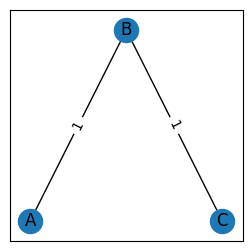


-----------------

t # 1
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1
e 1 2 1

Support: 2


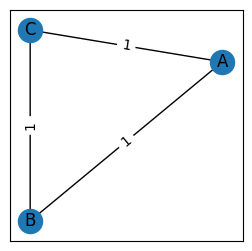


-----------------

t # 2
v 0 A
v 1 B
v 2 C
v 3 A
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


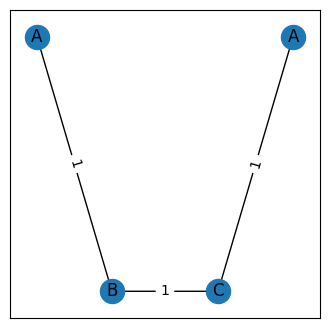


-----------------

t # 3
v 0 A
v 1 B
v 2 A
e 0 1 1
e 1 2 1

Support: 3


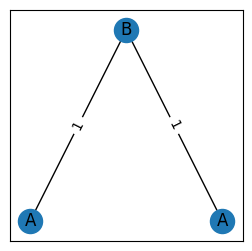


-----------------

t # 4
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 3


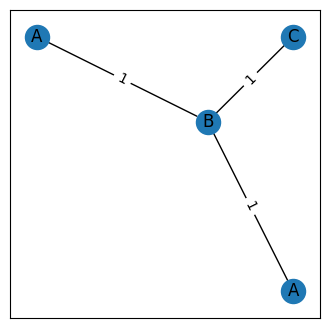


-----------------

t # 5
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


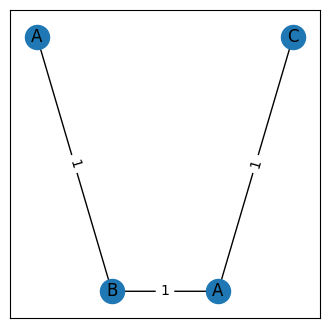


-----------------

t # 6
v 0 A
v 1 B
v 2 A
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


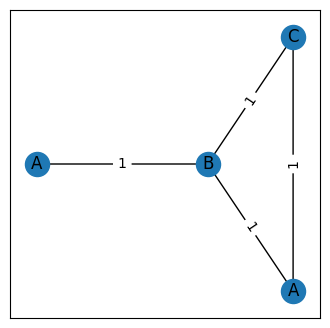


-----------------

t # 7
v 0 A
v 1 B
v 2 C
e 0 1 1
e 0 2 1

Support: 2


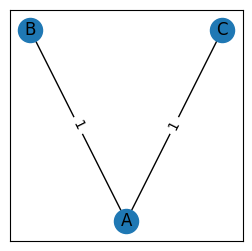


-----------------

t # 8
v 0 A
v 1 A
v 2 B
e 0 1 1
e 1 2 1

Support: 3


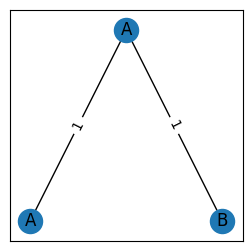


-----------------

t # 9
v 0 A
v 1 A
v 2 B
e 0 1 1
e 0 2 1
e 1 2 1

Support: 3


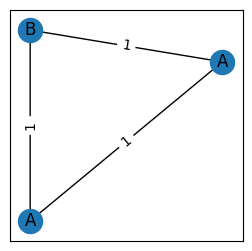


-----------------

t # 10
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 2 3 1

Support: 3


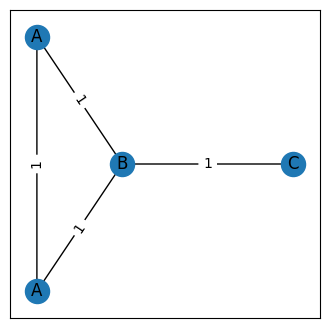


-----------------

t # 11
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


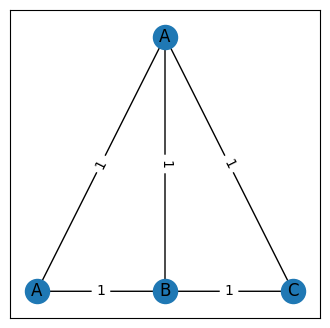


-----------------

t # 12
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 2 1
e 1 2 1
e 1 3 1

Support: 2


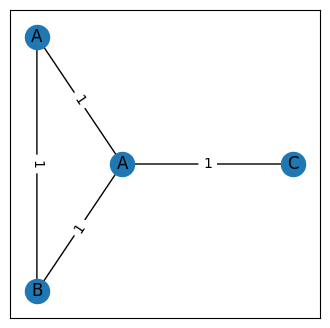


-----------------

t # 13
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 2 3 1

Support: 3


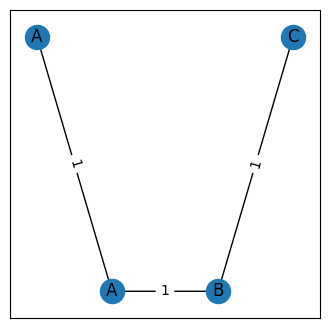


-----------------

t # 14
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1
e 2 3 1

Support: 2


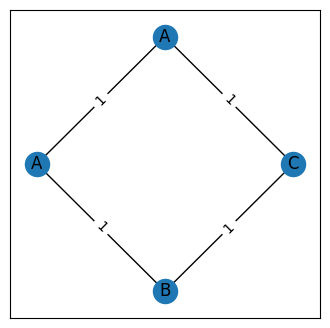


-----------------

t # 15
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1
e 2 3 1

Support: 2


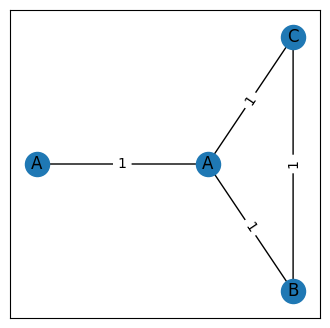


-----------------

t # 16
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 1 2 1
e 1 3 1

Support: 2


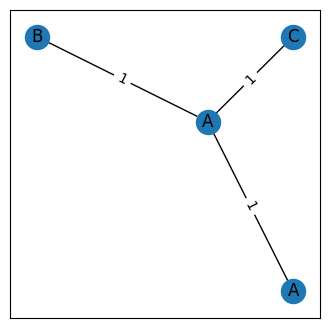


-----------------

t # 17
v 0 A
v 1 A
v 2 B
v 3 C
e 0 1 1
e 0 3 1
e 1 2 1

Support: 2


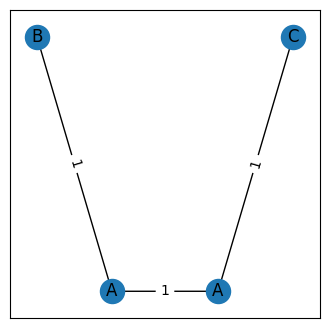


-----------------

t # 18
v 0 A
v 1 A
v 2 C
e 0 1 1
e 1 2 1

Support: 2


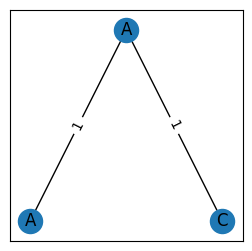


-----------------

t # 19
v 0 A
v 1 A
v 2 C
v 3 B
e 0 1 1
e 1 2 1
e 2 3 1

Support: 2


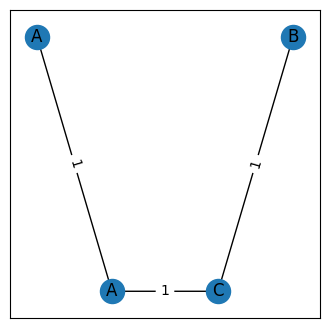


-----------------

t # 20
v 0 A
v 1 C
v 2 B
e 0 1 1
e 1 2 1

Support: 2


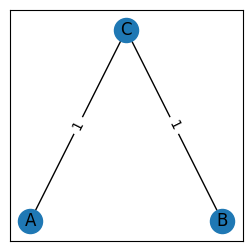


-----------------

Read:	0.0 s
Mine:	1.44 s
Total:	1.44 s


In [24]:
gs = main(FLAGS)
print(gs)

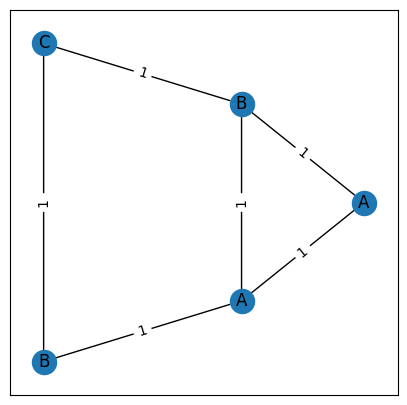

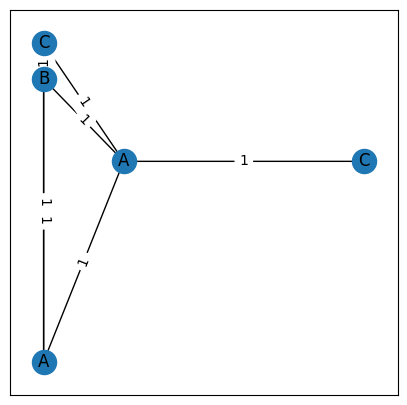

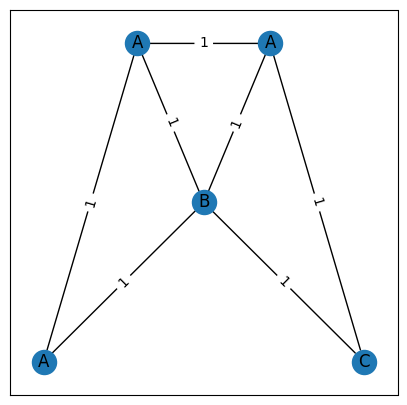

In [25]:
for g in gs.graphs.values():
    g.plot()

## 3. Apriori-based FSG Algorithm

In [48]:
from mlxtend.frequent_patterns import fpgrowth
from mlxtend.preprocessing import TransactionEncoder
import pandas as pd

# Define the list of transactions (subgraphs)
transactions = [
    ['A', 'B', 'C'],
    ['B', 'C', 'D'],
    ['A', 'C', 'D'],
    ['B', 'D'],
    ['A', 'C'],
    ['B', 'C'],
    ['A', 'B', 'D']
]

# Initialize the TransactionEncoder
te = TransactionEncoder()
te_ary = te.fit(transactions).transform(transactions)

# Convert the encoded transactions to a DataFrame
df = pd.DataFrame(te_ary, columns=te.columns_)

# Apply the apriori-based FPGrowth algorithm
frequent_subgraphs = fpgrowth(df, min_support=0.3, use_colnames=True)

# Print the frequent subgraphs
print(frequent_subgraphs)


    support itemsets
0  0.714286      (C)
1  0.714286      (B)
2  0.571429      (A)
3  0.571429      (D)
4  0.428571   (C, B)
5  0.428571   (C, A)
6  0.428571   (D, B)


## 4. Transforming smiles codes in molecular dataset to graphs

num                                              2
name                          Terbutylchlorambucil
p_np                                             1
smiles    C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
Name: 1, dtype: object


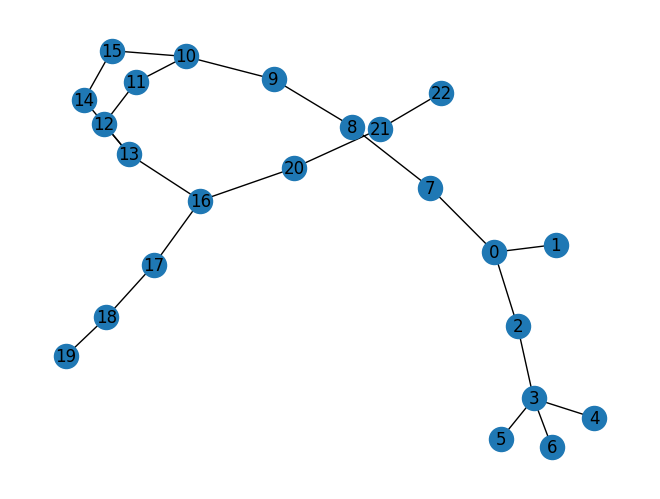

In [2]:
# Convert SMILES strings to graphs
import numpy as np
import pandas as pd
import networkx as nx
from rdkit import Chem
from rdkit import RDLogger

# Read the dataset 
df = pd.read_csv('./graphdata/Molecular_Sample.csv')

# Display the first row of the dataset
print(df.iloc[1])

graphs = []
for smiles in df['smiles']:
    mol = Chem.MolFromSmiles(smiles, sanitize=False)
    G = nx.Graph()
    for atom in mol.GetAtoms():
        G.add_node(atom.GetIdx(), element=atom.GetSymbol())
    for bond in mol.GetBonds():
        G.add_edge(bond.GetBeginAtomIdx(), bond.GetEndAtomIdx(), bond_type=bond.GetBondType())
    graphs.append(G)
    
#Visualize the first graph
nx.draw(graphs[1], with_labels=True)

In [9]:
import networkx as nx

# Assuming graphs is the list of all graphs
for i, graph in enumerate(graphs):
    # Specify the file path to save the text representation of the graph
    # Create a directory called './graphdata/test/' in the current working directory before running this code
    file_path = f"./graphdata/test/graph{i}.txt"

    # Write the graph as an adjacency list to the file
    nx.write_adjlist(graph, file_path)

    # Read the contents of the file, remove lines starting with '#'
    with open(file_path, "r") as file:
        lines = file.readlines()

    # Filter out lines starting with '#'
    lines = [line for line in lines if not line.startswith('#')]

    # Write the filtered lines back to the file
    with open(file_path, "w") as file:
        file.writelines(lines)

In [10]:
import os

# Define the directory where the graph files are located
directory_path = './graphdata/test/'

# Get a list of all the graph files in the directory
graph_files = [f for f in os.listdir(directory_path) if f.startswith('graph')]

# Sort the graph files by their index
graph_files.sort(key=lambda x: int(x[5:-4]))  # Sort by the number in 'graph#.txt'

# Define the node labels
node_labels = [chr(i) for i in range(ord('A'), ord('Z')+1)] + [chr(i)+chr(j) for i in range(ord('A'), ord('Z')+1) for j in range(ord('A'), ord('Z')+1)]

# Specify the output file path
output_file_path = './graphdata/test/output'

# Open the output file in write mode
with open(output_file_path, 'w') as outfile:
    # Load each graph file
    for i, graph_file in enumerate(graph_files):
        # Load the graph structure from the file
        with open(directory_path + graph_file, 'r') as infile:
            lines = infile.readlines()

        # Parse the graph structure
        graph_structure = {}
        for line in lines:
            node, *edges = map(int, line.split())
            graph_structure[node] = edges

        # Write the graph structure to the file
        outfile.write(f"t # {i}\n")
        
        # First, write all the vertices
        for node in graph_structure.keys():
            if node < len(node_labels):  # Check if the node value is within the range of the node_labels list
                outfile.write(f"v {node} {node_labels[node]}\n")  # Use the node label from the list

        # Then, write all the edges
        for node, edges in graph_structure.items():
            for edge in edges:
                outfile.write(f"e {node} {edge} 1\n")  # Assuming all edges have a weight of 1

## 5. Applying gspan algorithm to find frequent subgraph mining

t # 0
v 0 B
v 1 C
v 2 D
e 0 1 1
e 1 2 1

Support: 17


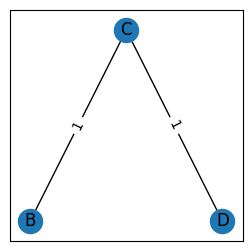


-----------------

t # 1
v 0 E
v 1 F
v 2 G
e 0 1 1
e 1 2 1

Support: 20


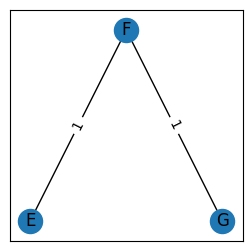


-----------------

t # 2
v 0 E
v 1 F
v 2 G
v 3 H
e 0 1 1
e 1 2 1
e 2 3 1

Support: 17


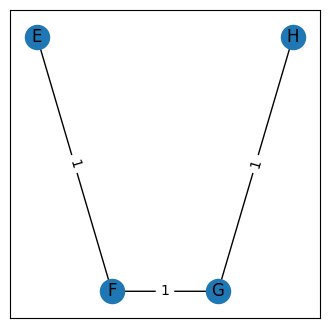


-----------------

t # 3
v 0 F
v 1 G
v 2 H
e 0 1 1
e 1 2 1

Support: 19


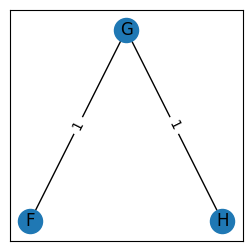


-----------------

t # 4
v 0 G
v 1 H
v 2 I
e 0 1 1
e 1 2 1

Support: 17


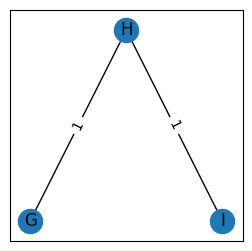


-----------------

t # 5
v 0 I
v 1 J
v 2 K
e 0 1 1
e 1 2 1

Support: 19


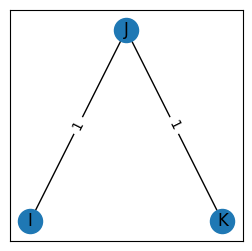


-----------------

t # 6
v 0 I
v 1 J
v 2 K
v 3 L
e 0 1 1
e 1 2 1
e 2 3 1

Support: 17


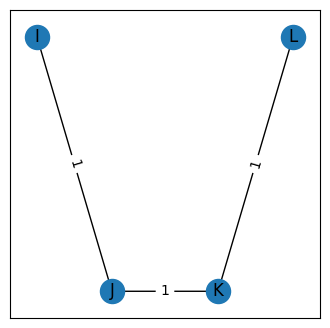


-----------------

t # 7
v 0 J
v 1 K
v 2 L
e 0 1 1
e 1 2 1

Support: 19


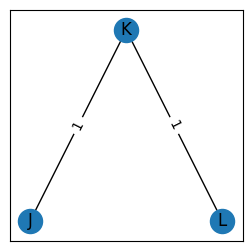


-----------------

t # 8
v 0 R
v 1 S
v 2 T
e 0 1 1
e 1 2 1

Support: 15


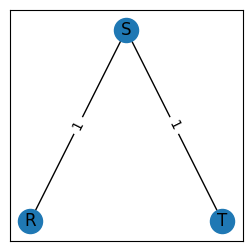


-----------------

t # 9
v 0 A
v 1 B
v 2 C
e 0 1 1
e 1 2 1

Support: 23


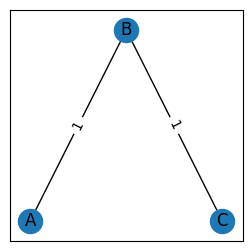


-----------------

t # 10
v 0 A
v 1 B
v 2 C
v 3 D
e 0 1 1
e 1 2 1
e 2 3 1

Support: 16


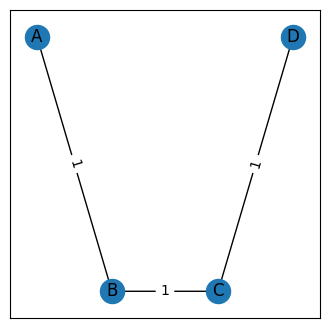


-----------------

t # 11
v 0 D
v 1 E
v 2 F
e 0 1 1
e 1 2 1

Support: 19


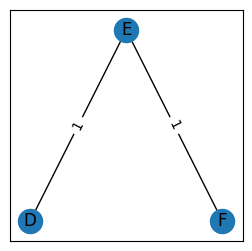


-----------------

t # 12
v 0 D
v 1 E
v 2 F
v 3 G
e 0 1 1
e 1 2 1
e 2 3 1

Support: 17


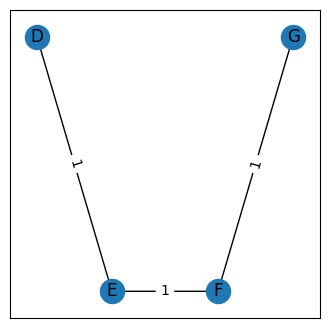


-----------------

t # 13
v 0 H
v 1 I
v 2 J
e 0 1 1
e 1 2 1

Support: 17


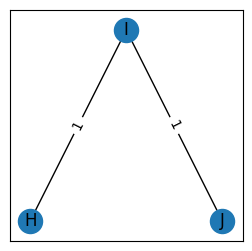


-----------------

Read:	0.0 s
Mine:	0.7 s
Total:	0.7 s
{0: <gspan_mining.graph.Graph object at 0x7c866b93bdc0>, 1: <gspan_mining.graph.Graph object at 0x7c8661950100>, 2: <gspan_mining.graph.Graph object at 0x7c8668f95fc0>, 3: <gspan_mining.graph.Graph object at 0x7c86c88bb250>, 4: <gspan_mining.graph.Graph object at 0x7c86619a0af0>, 5: <gspan_mining.graph.Graph object at 0x7c8660f7c4c0>, 6: <gspan_mining.graph.Graph object at 0x7c8660f7f2b0>, 7: <gspan_mining.graph.Graph object at 0x7c8660f84e20>, 8: <gspan_mining.graph.Graph object at 0x7c8660f87070>, 9: <gspan_mining.graph.Graph object at 0x7c8660f88070>, 10: <gspan_mining.graph.Graph object at 0x7c8660fba380>, 11: <gspan_mining.graph.Graph object at 0x7c8660fbb790>, 12: <gspan_mining.graph.Graph object at 0x7c8660fbd2a0>, 13: <gspan_mining.graph.Graph object at 0x7c8660fbf610>, 14: <gspan_mining.graph.Graph object at 0x7c8660fc1f90>, 15: <gspan_mining.graph.Graph object at 0x7c8660fc38e0>, 16: <gspan_mining.graph.Graph object at 

In [5]:
args_str = '-s 15 -l 3 -p True ./graphdata/test/output'
FLAGS, _ = parser.parse_known_args(args=args_str.split())

gs = main(FLAGS)
# The frequent subgraphs are stored in gs.graphs
frequent_subgraphs = gs.graphs
print(gs)
print(frequent_subgraphs)

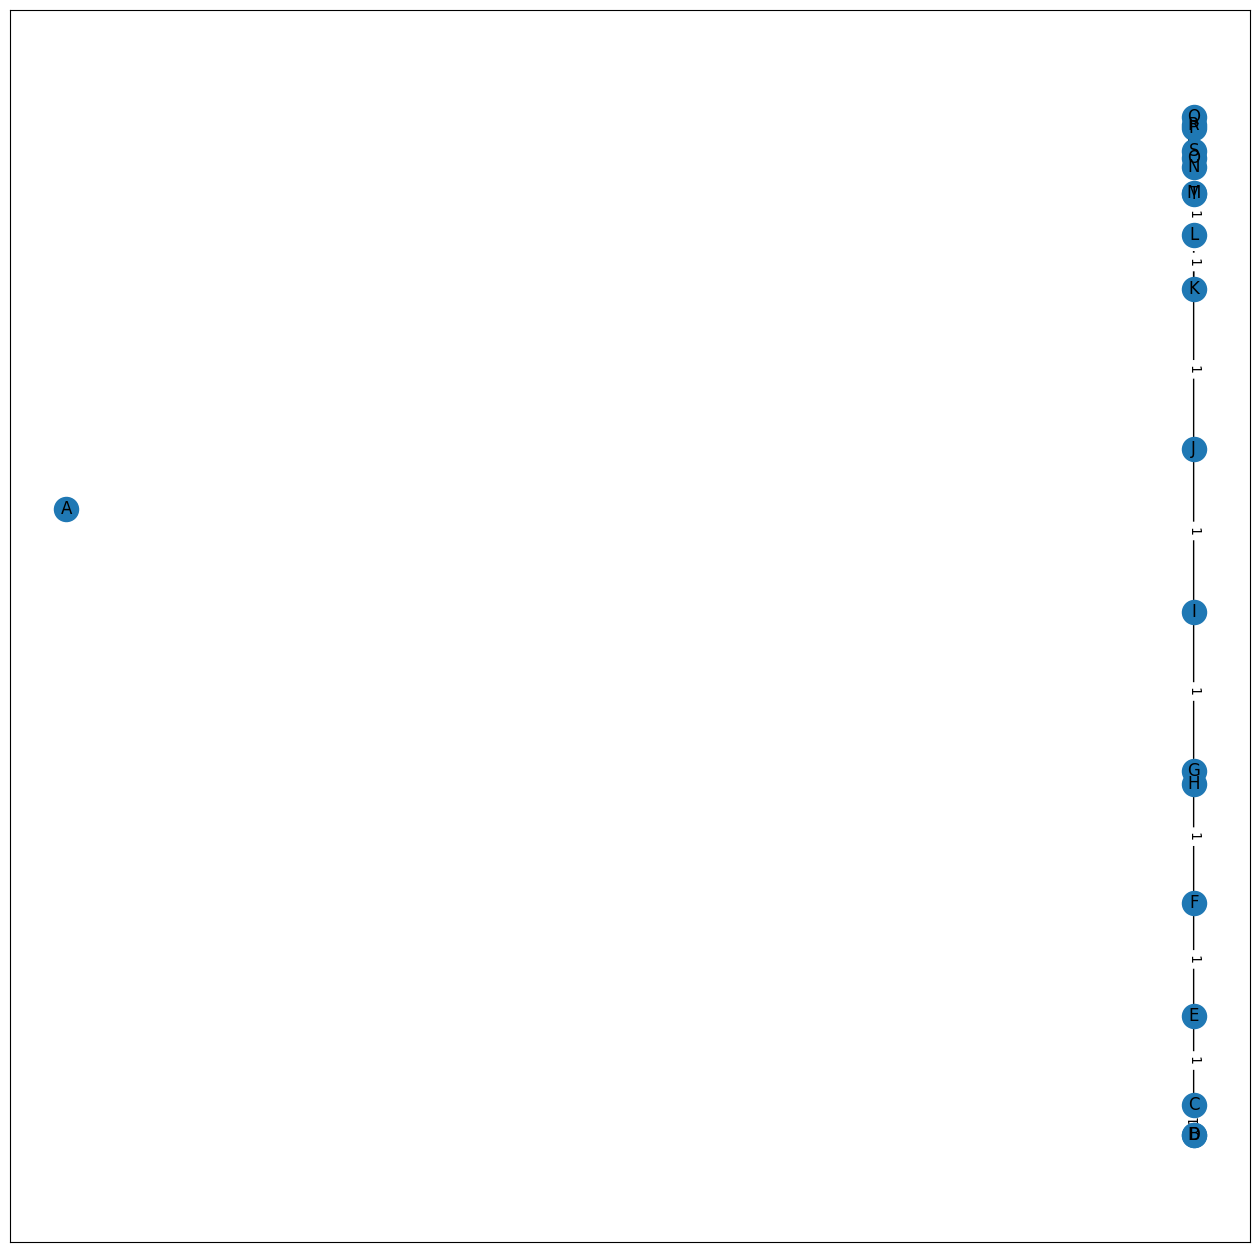

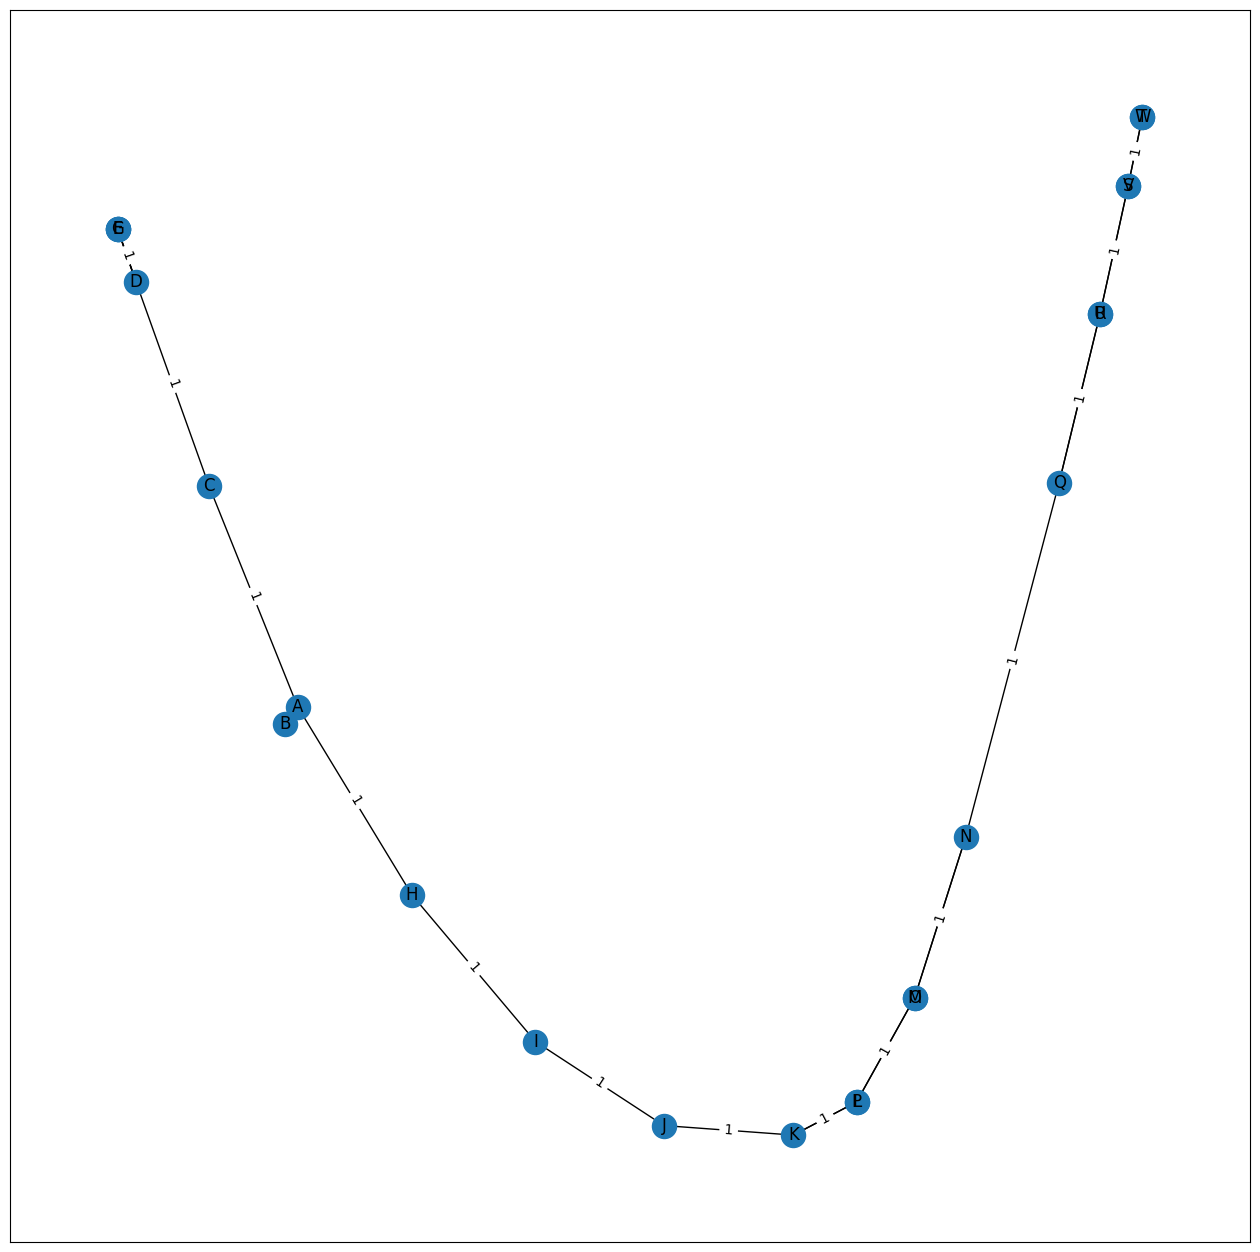

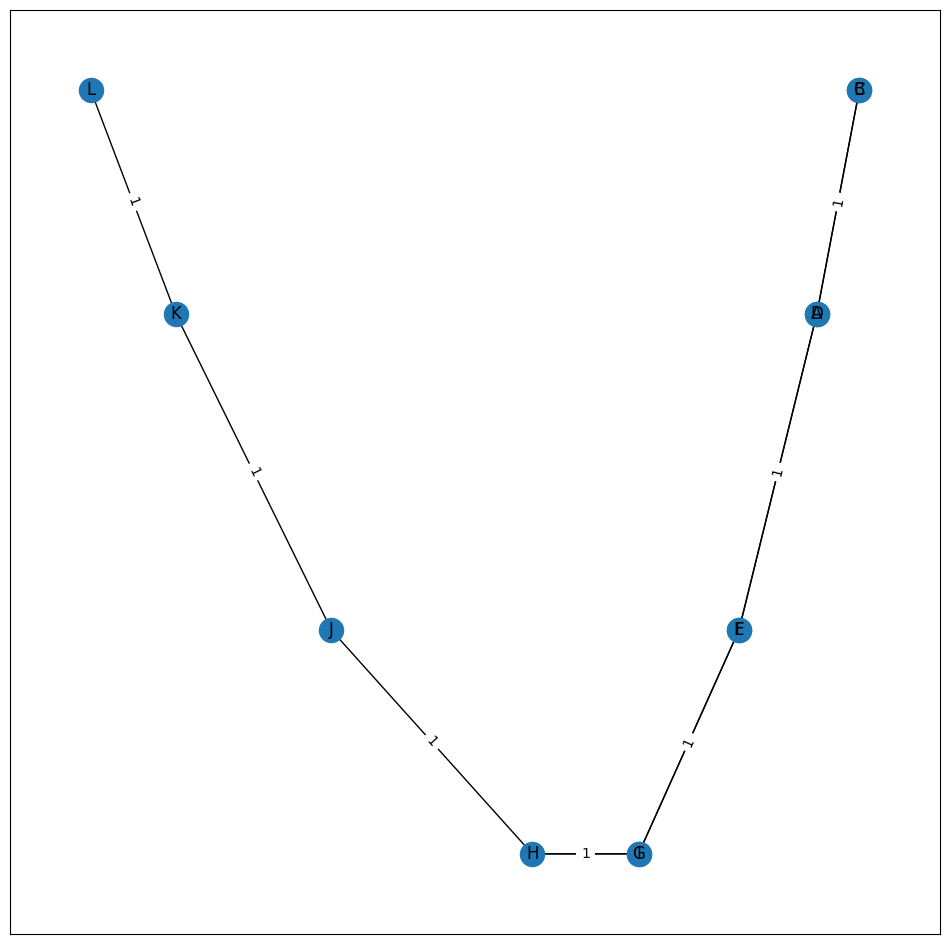

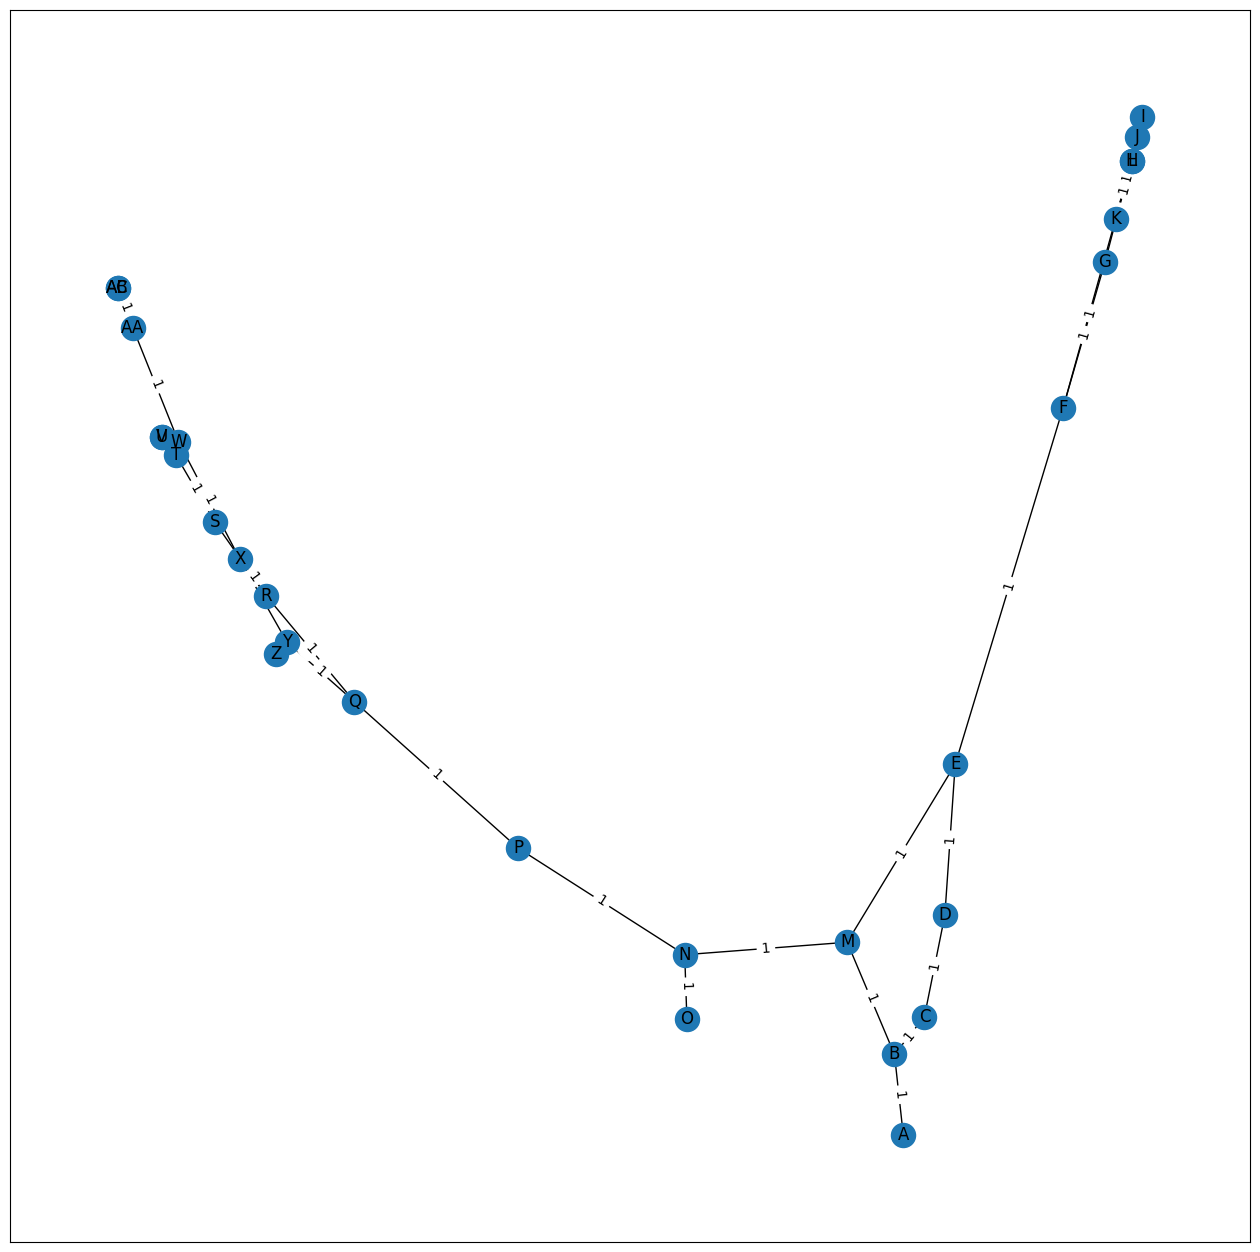

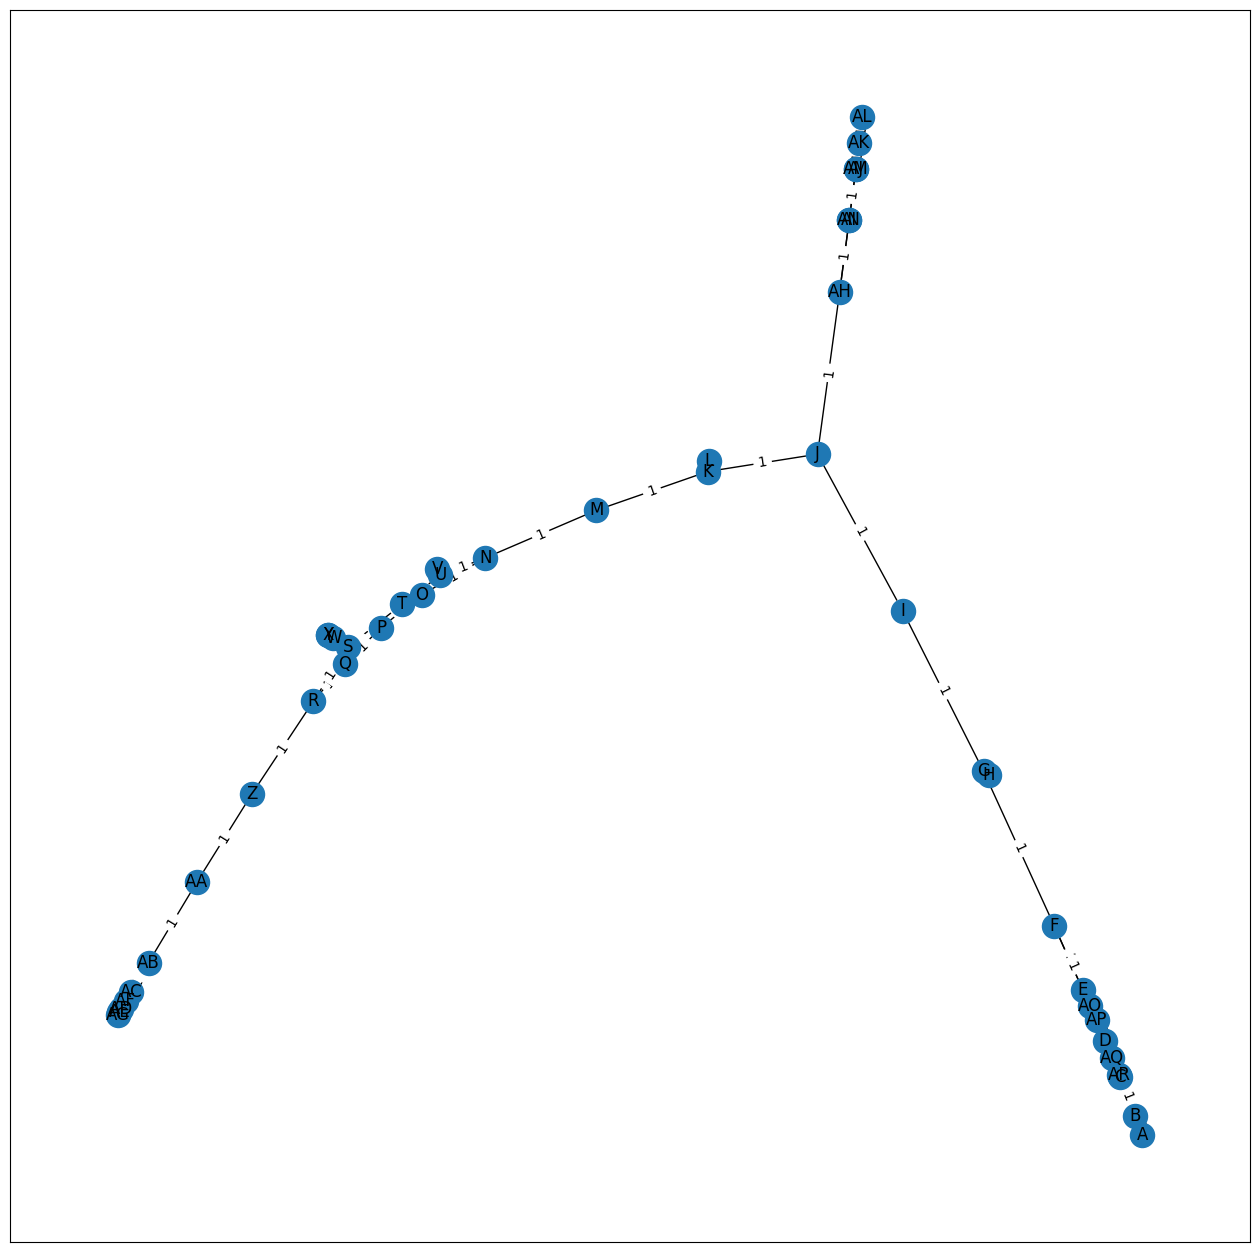

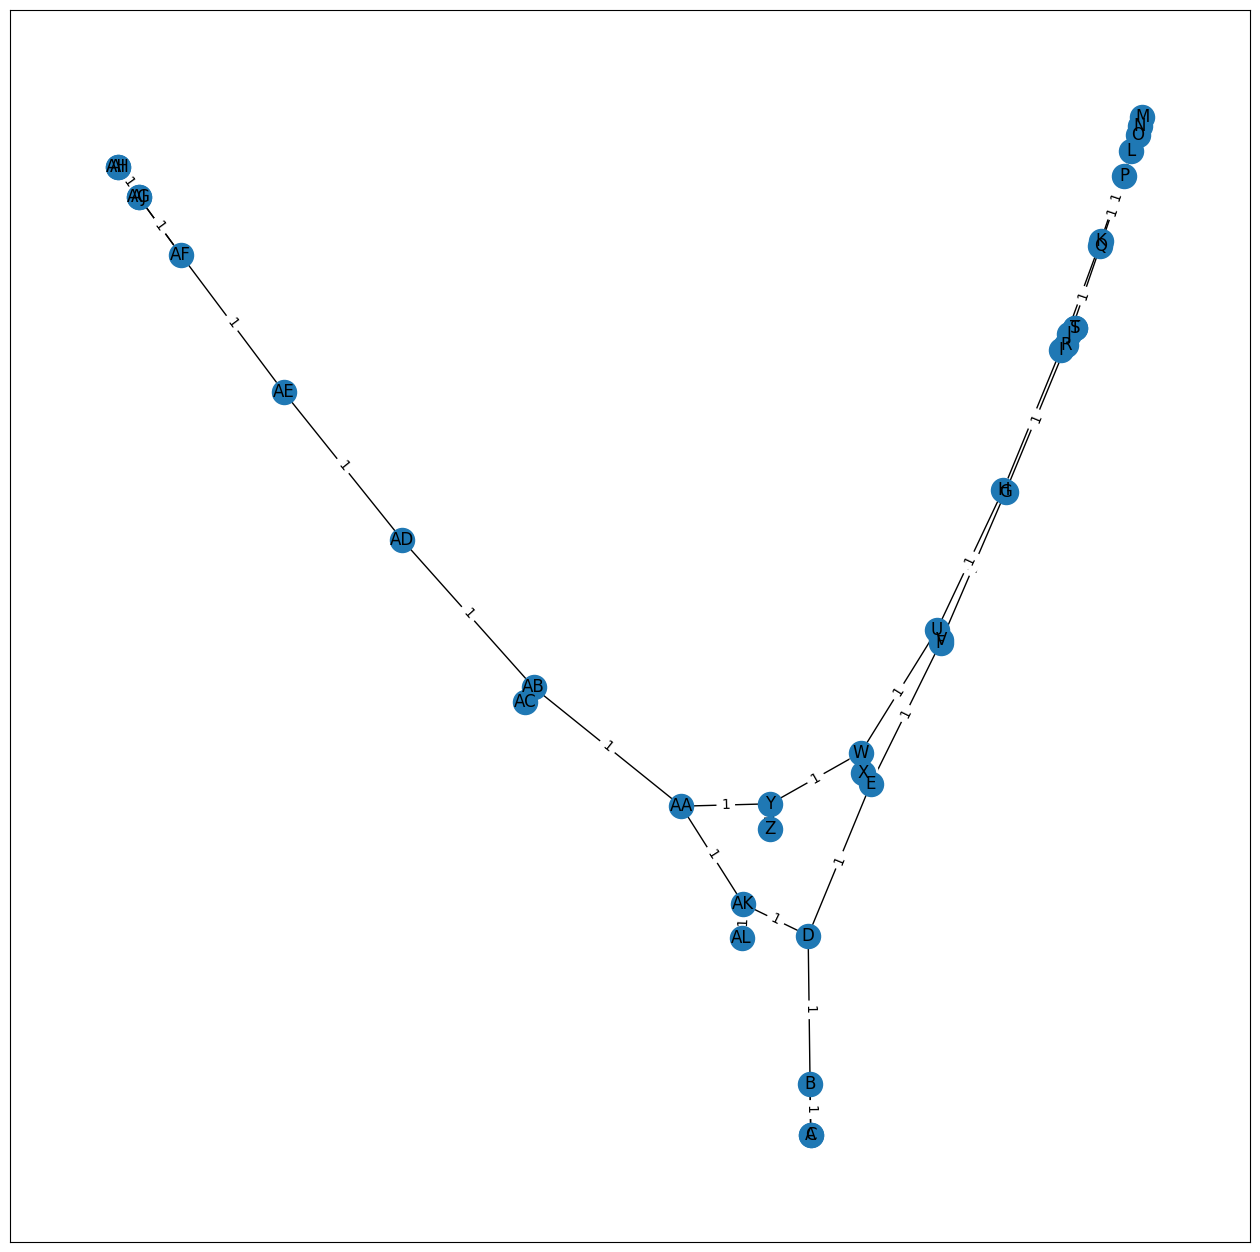

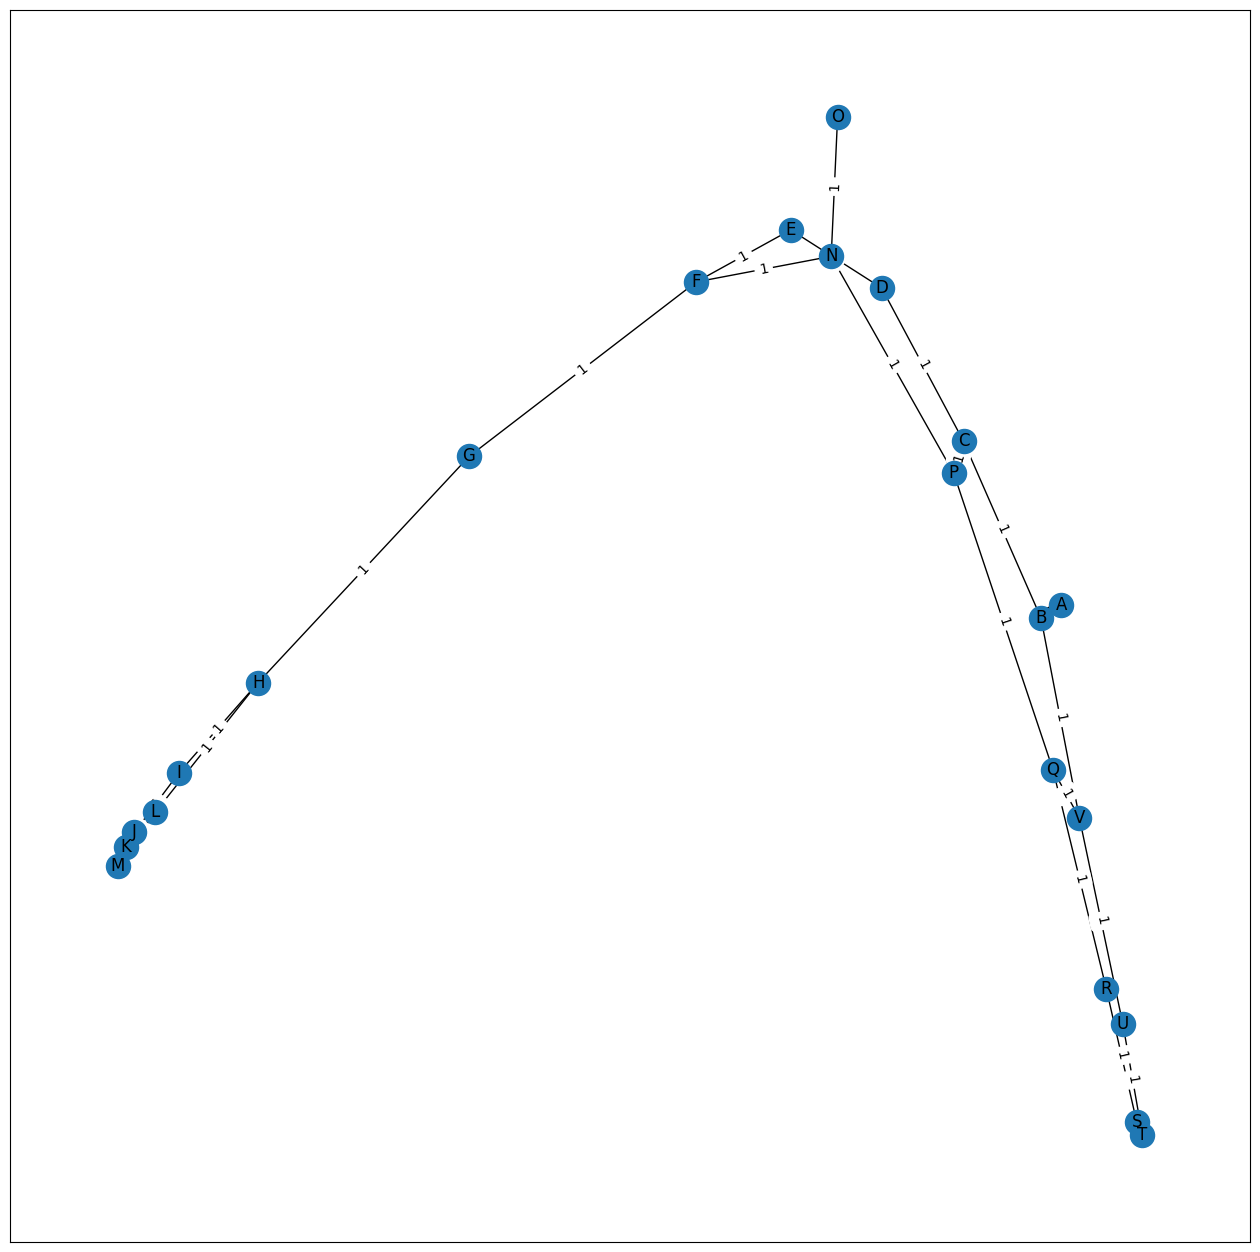

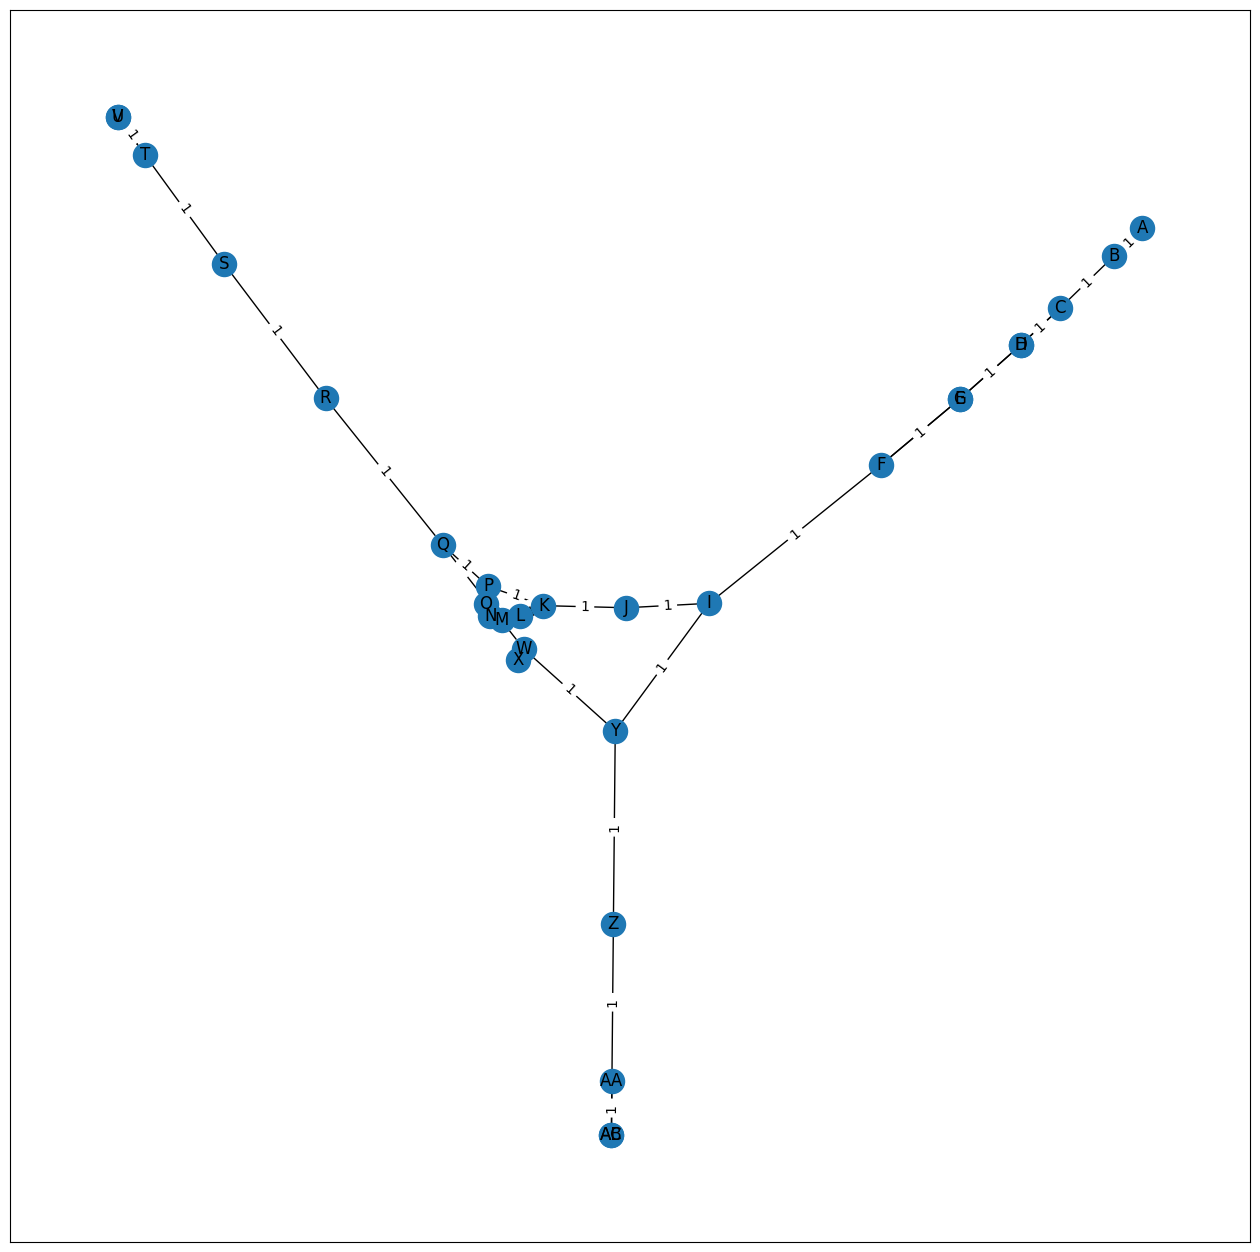

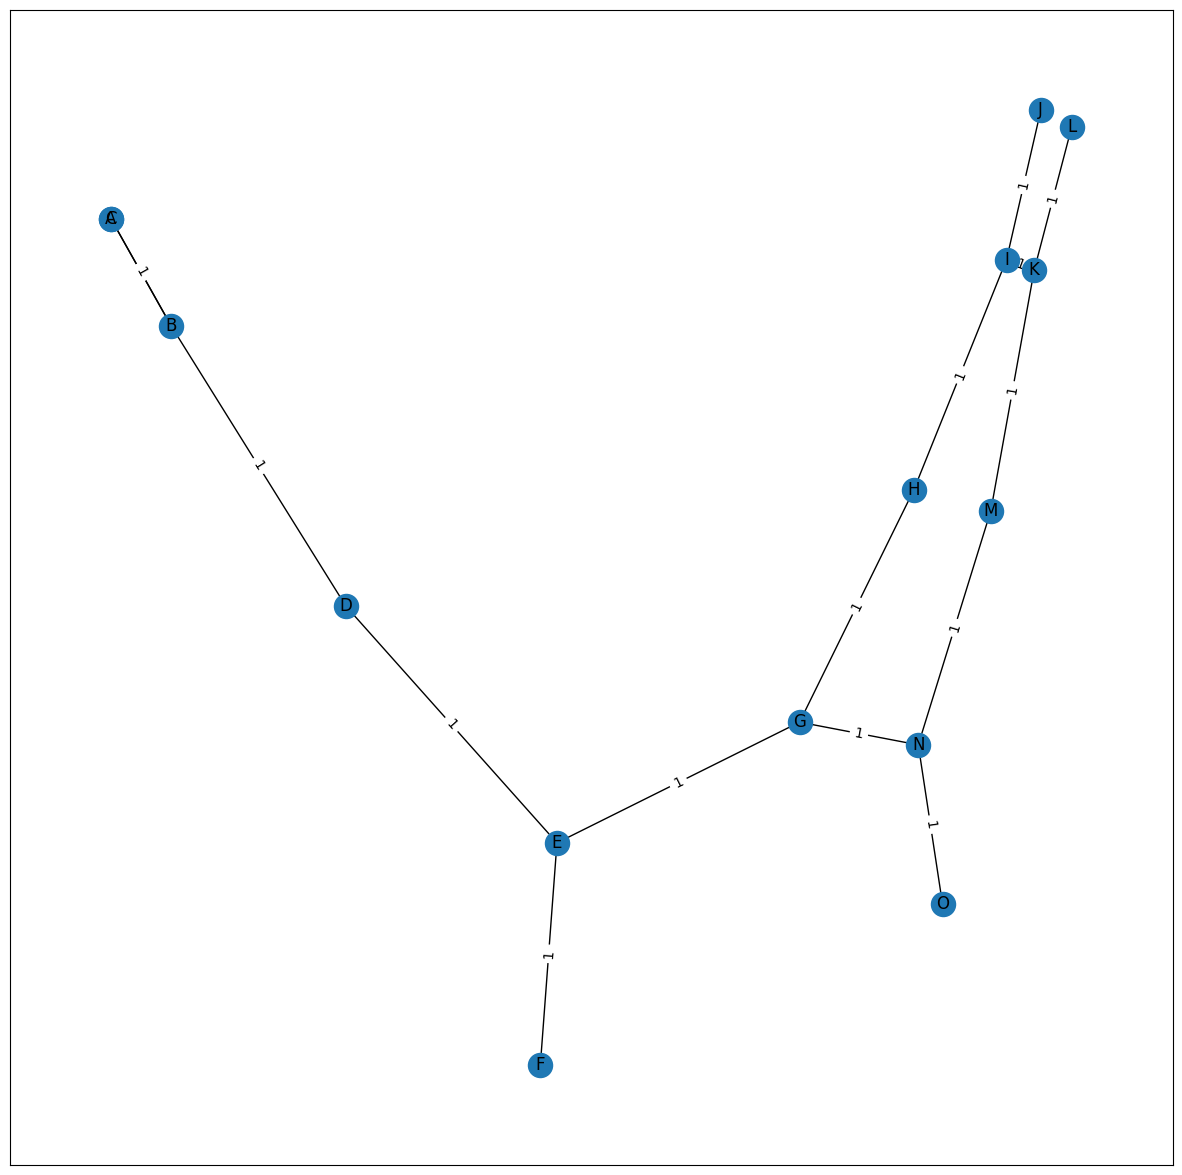

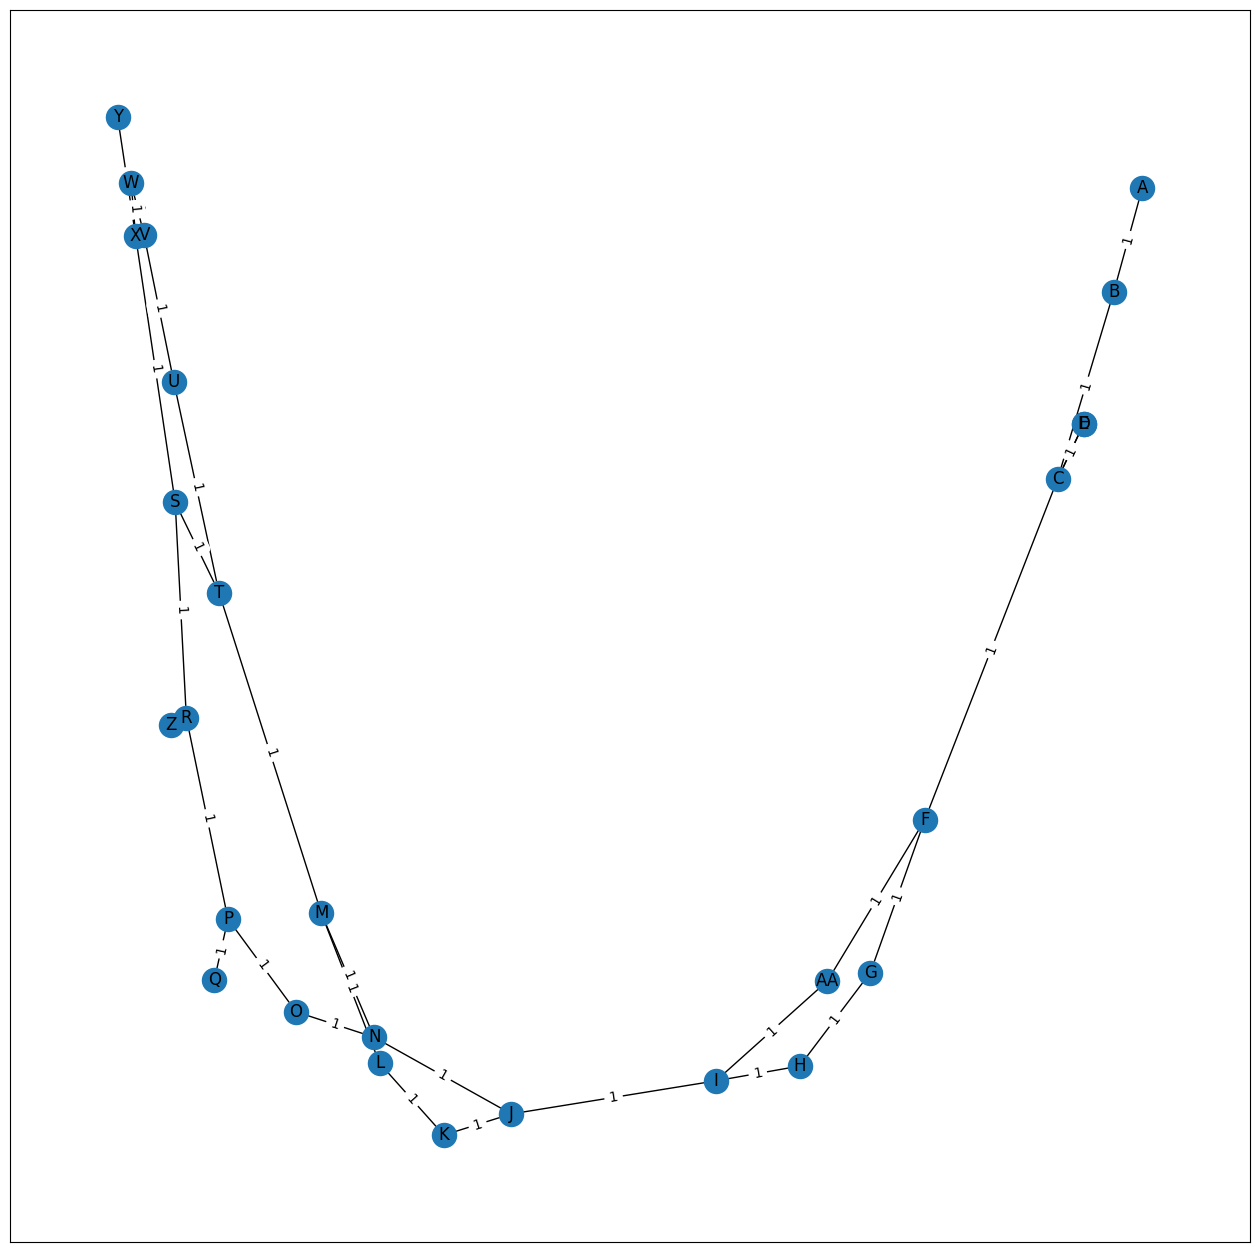

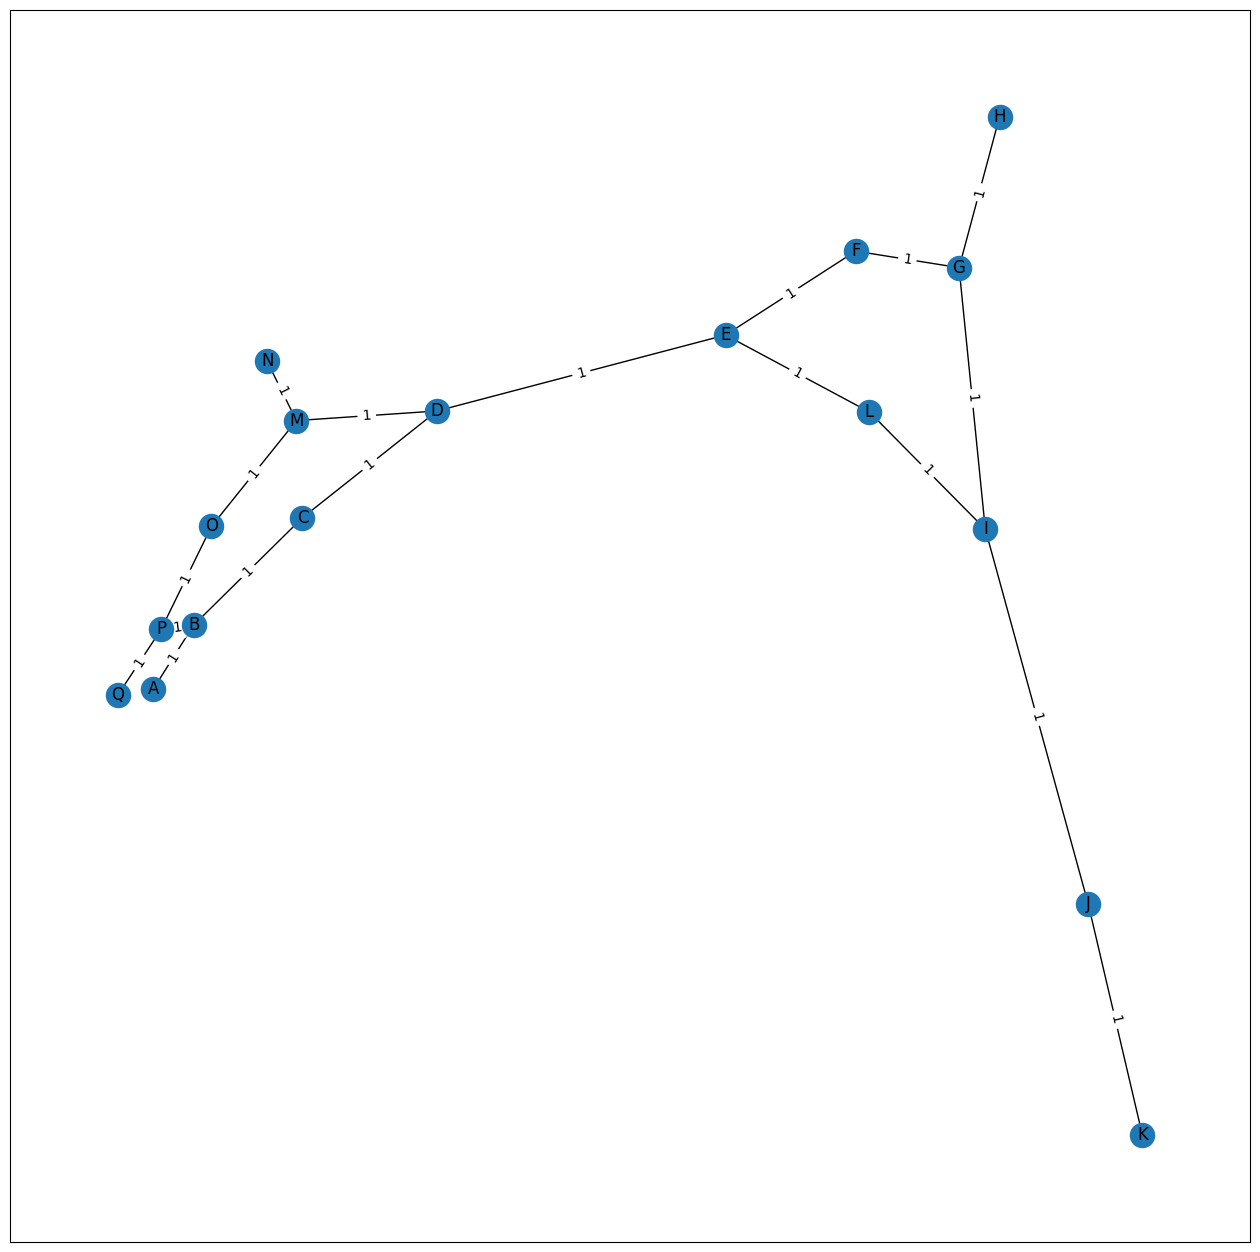

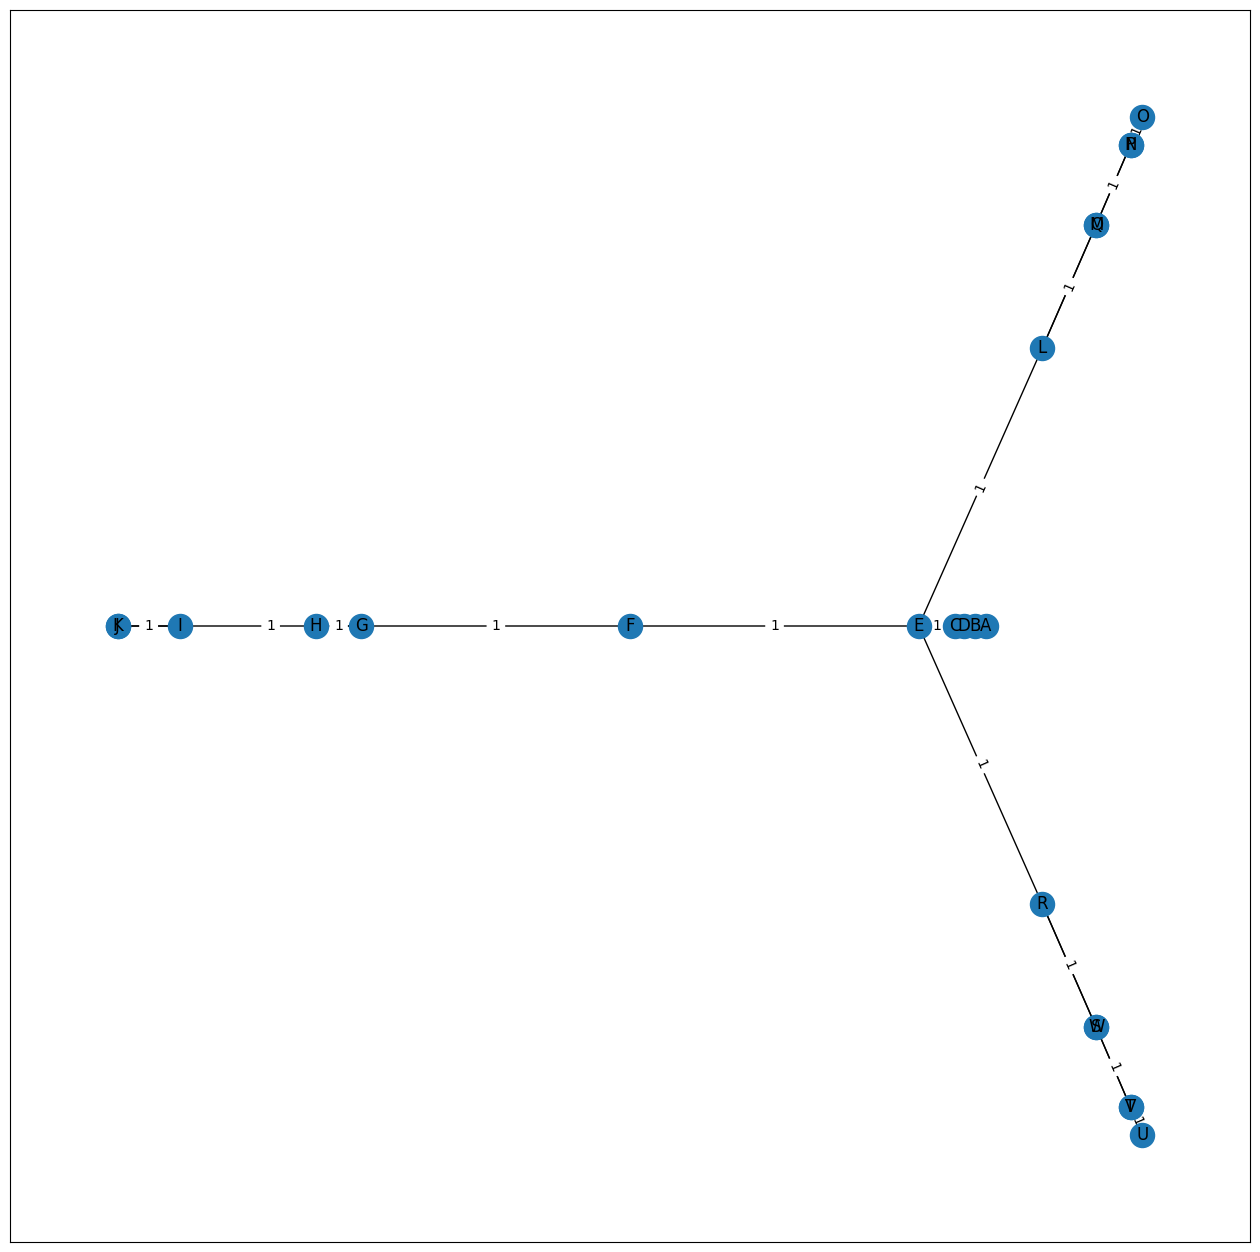

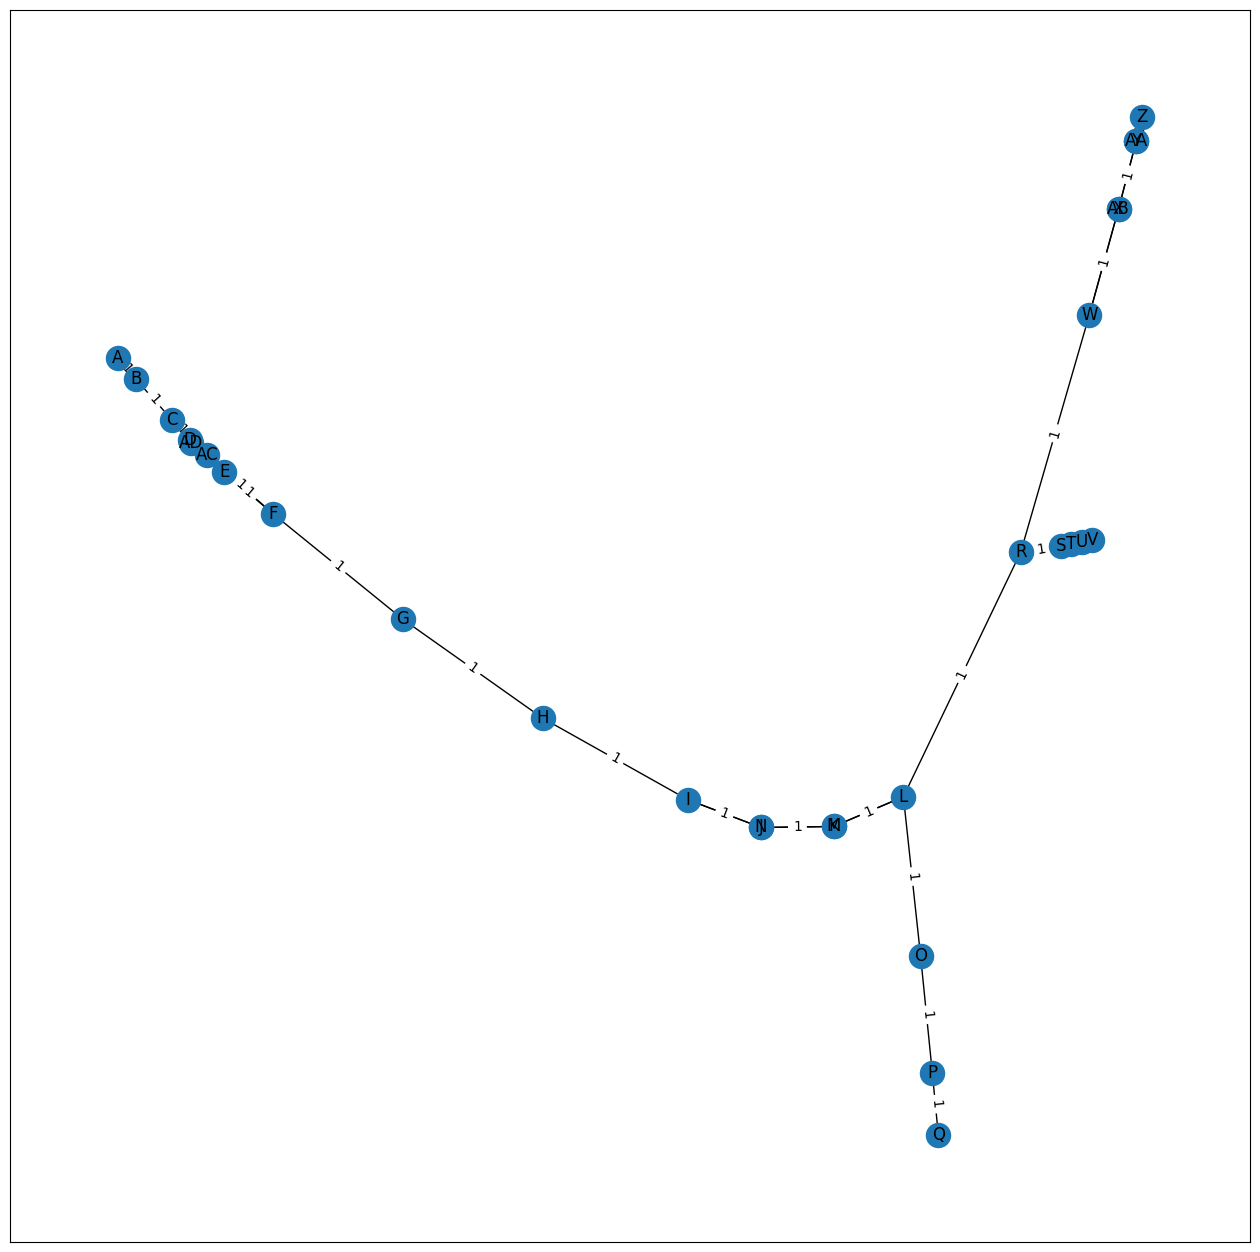

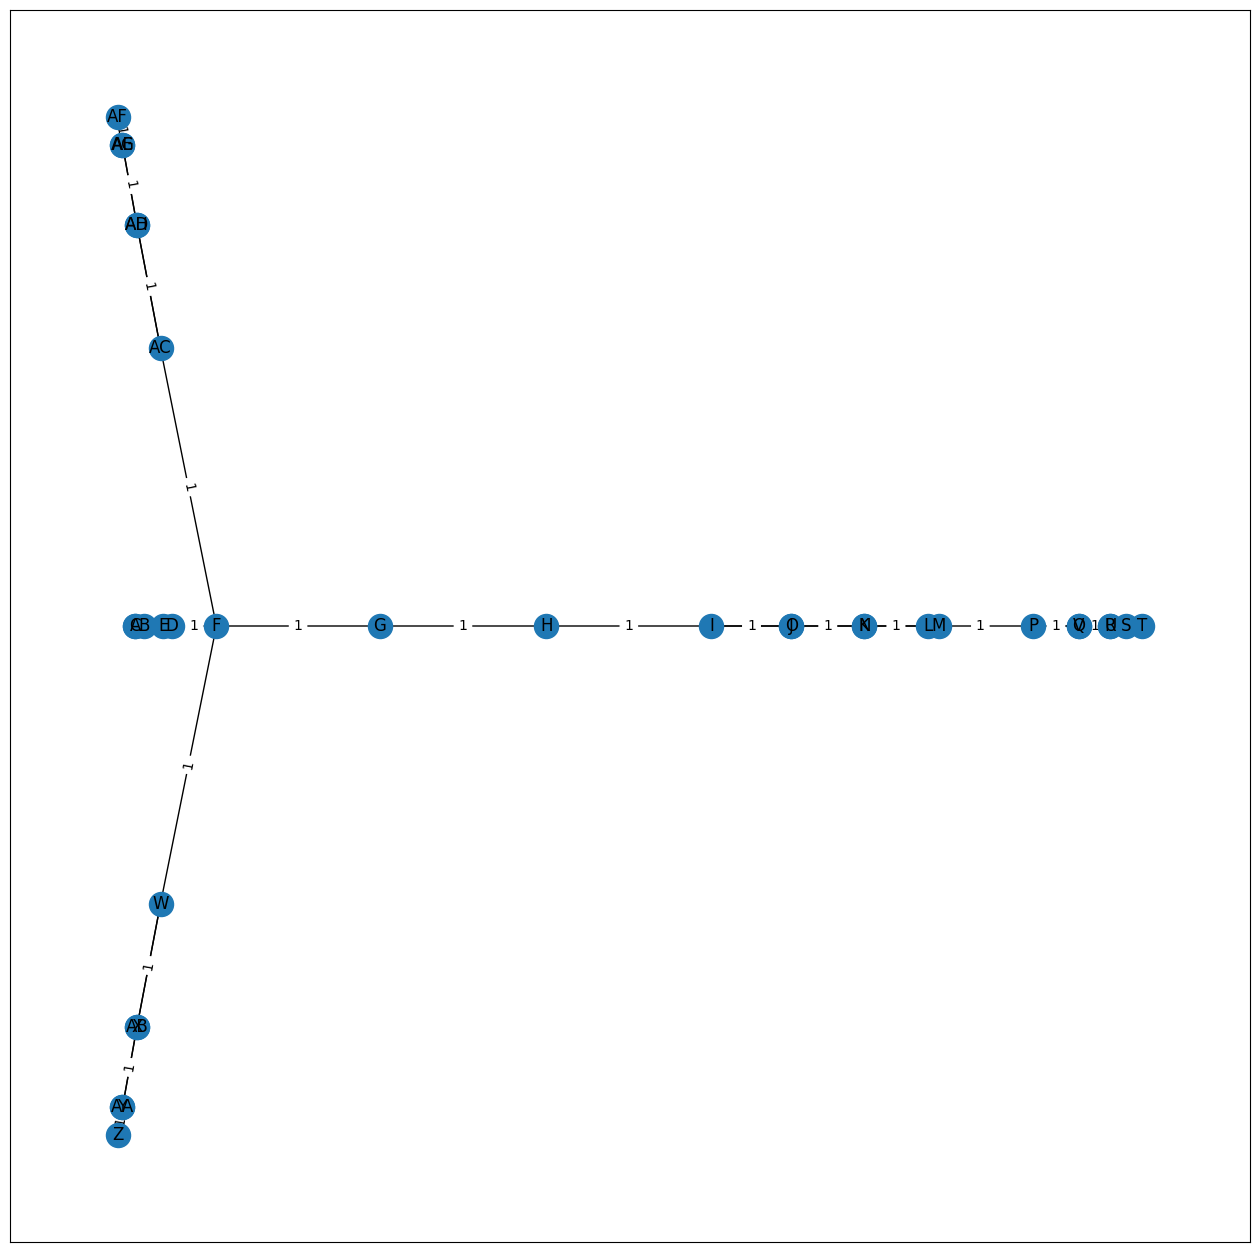

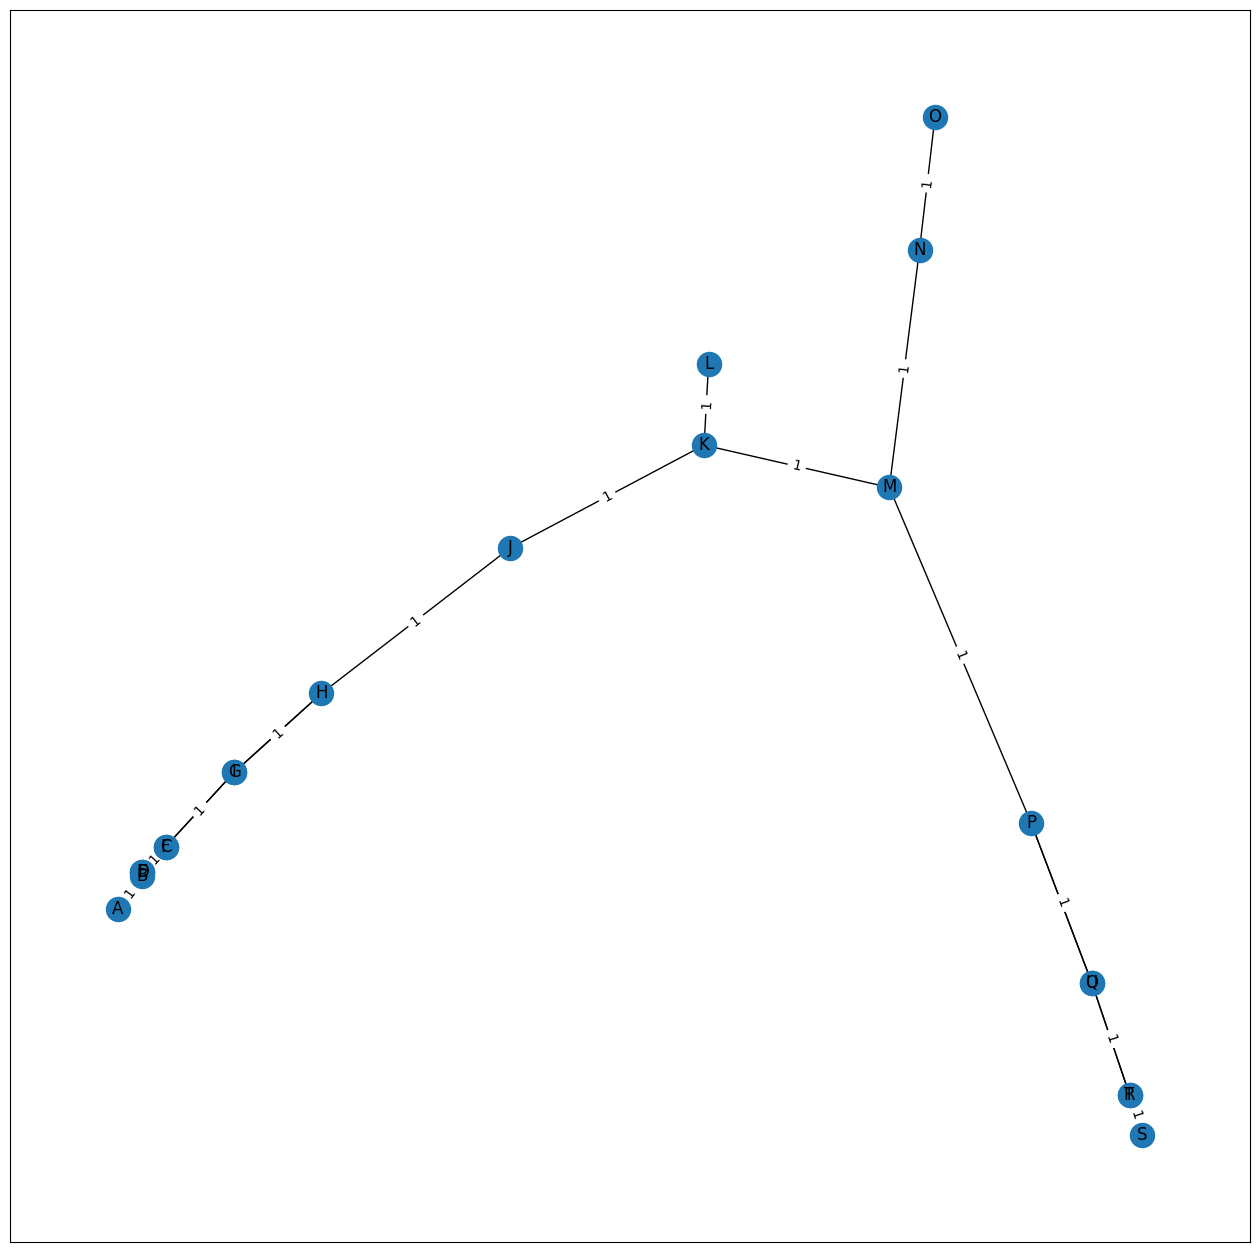

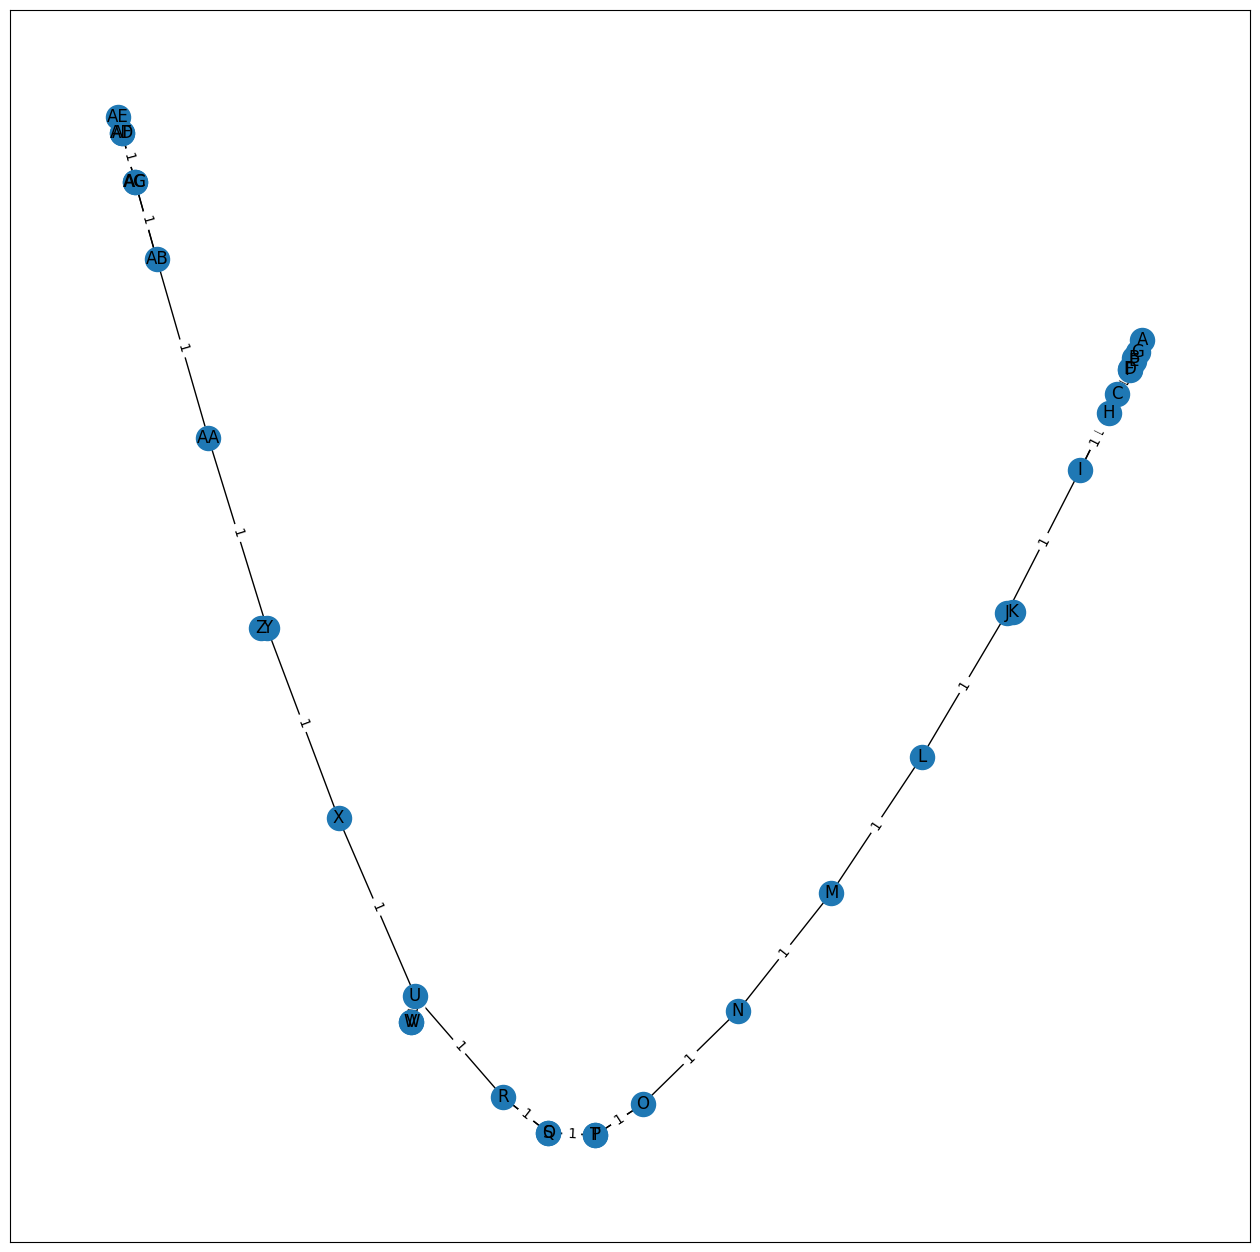

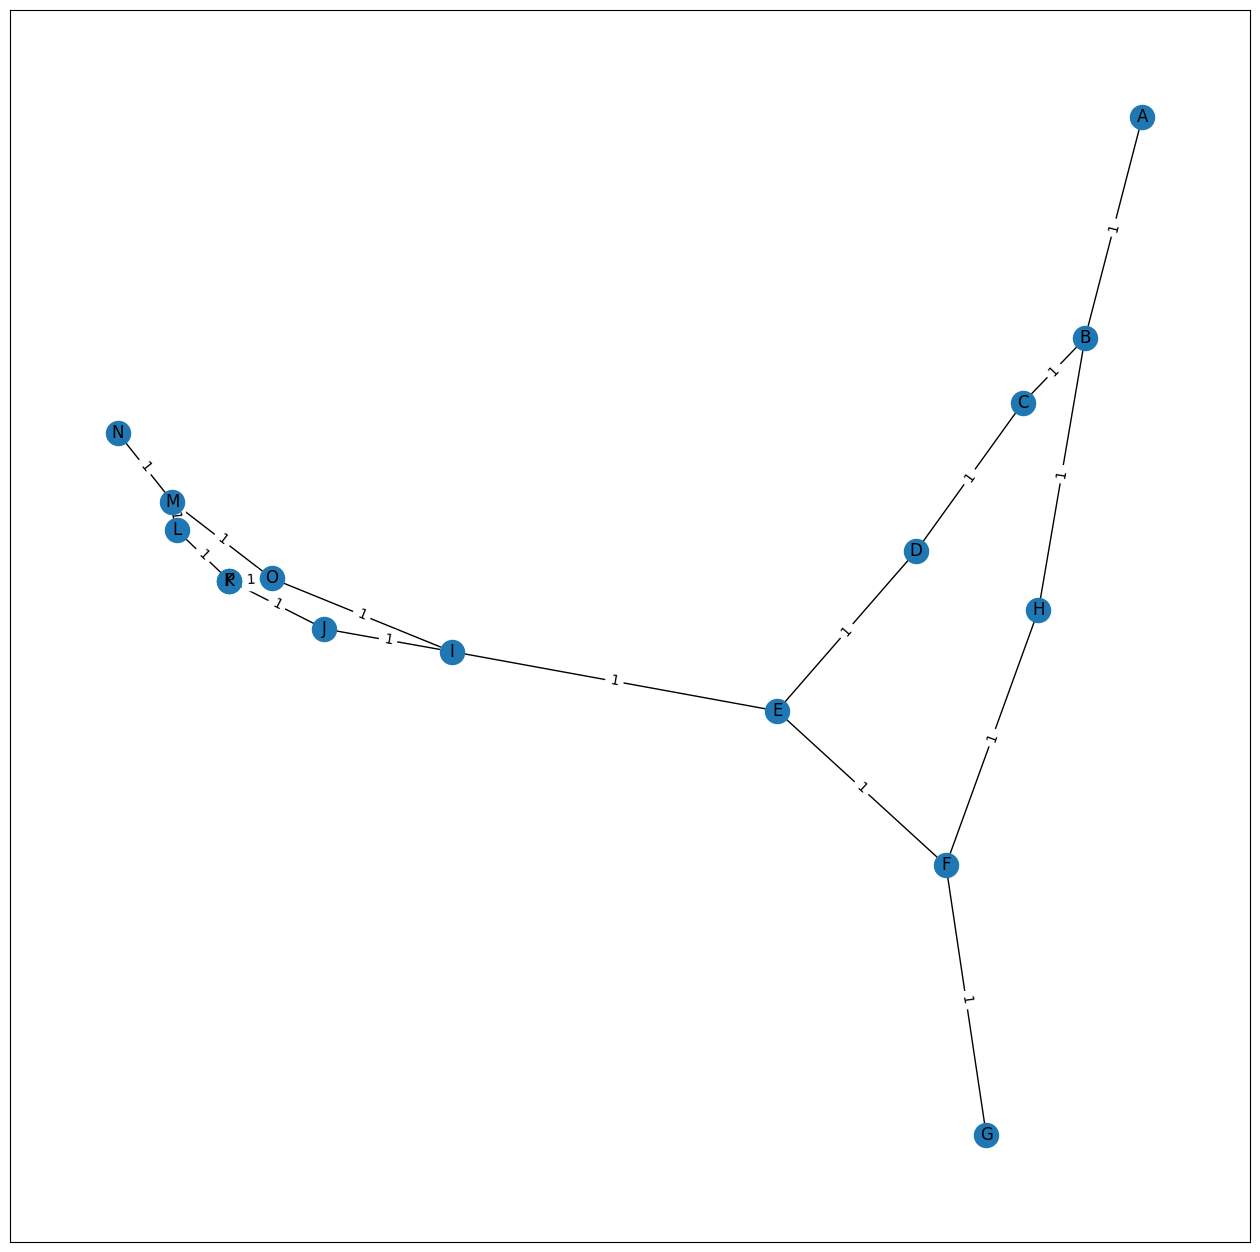

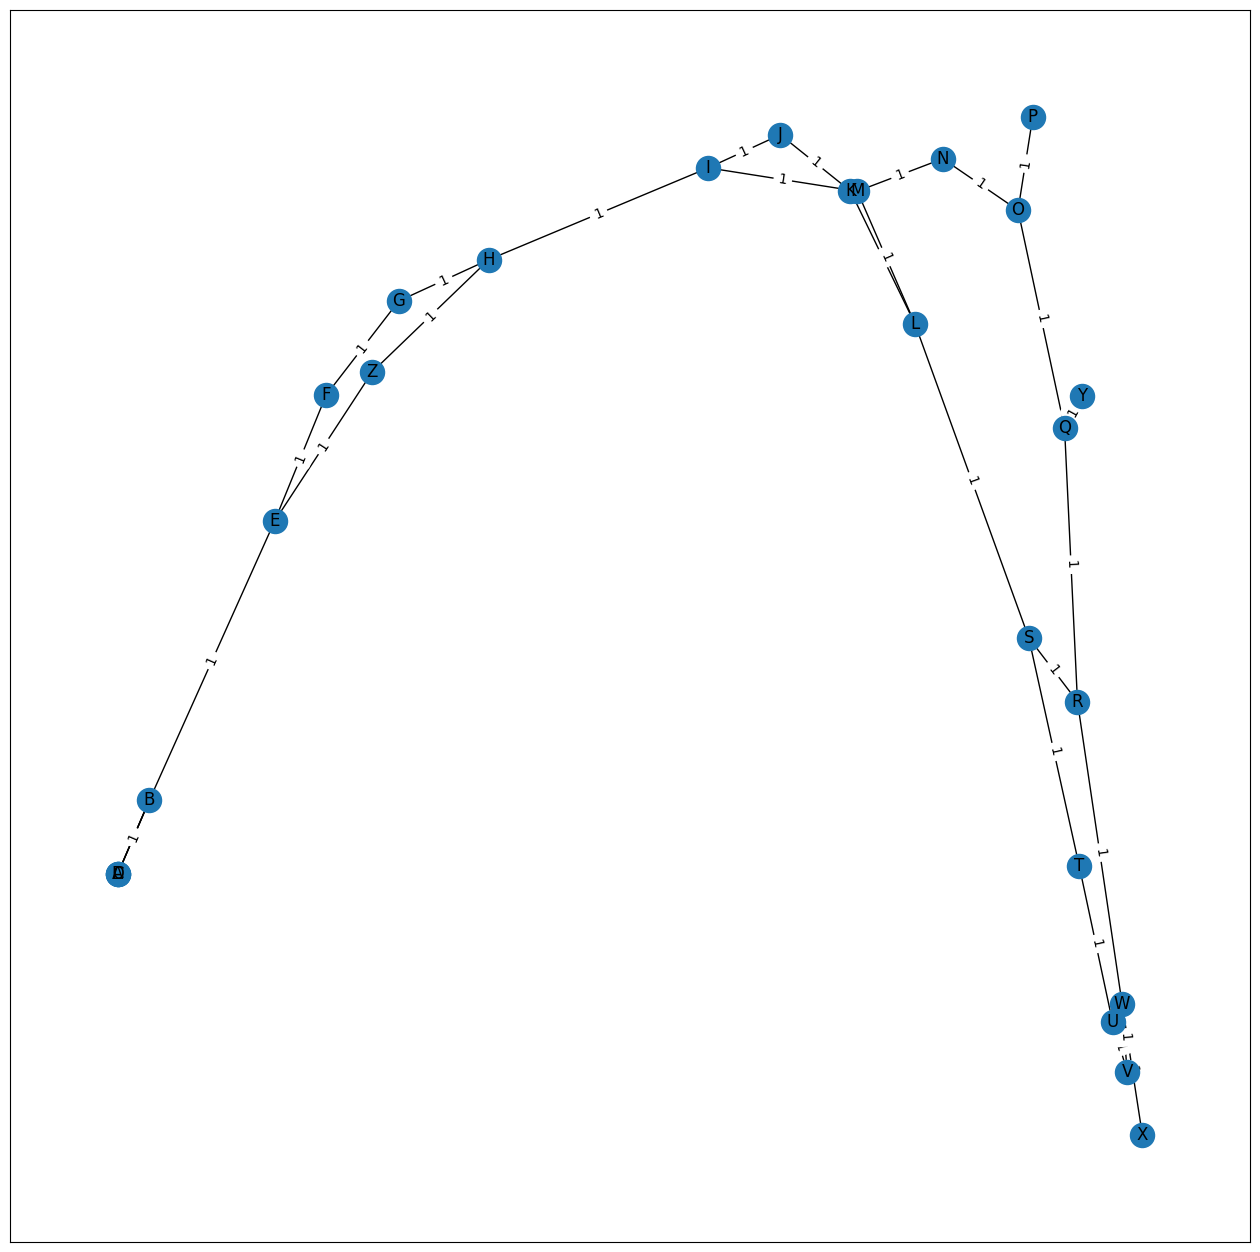

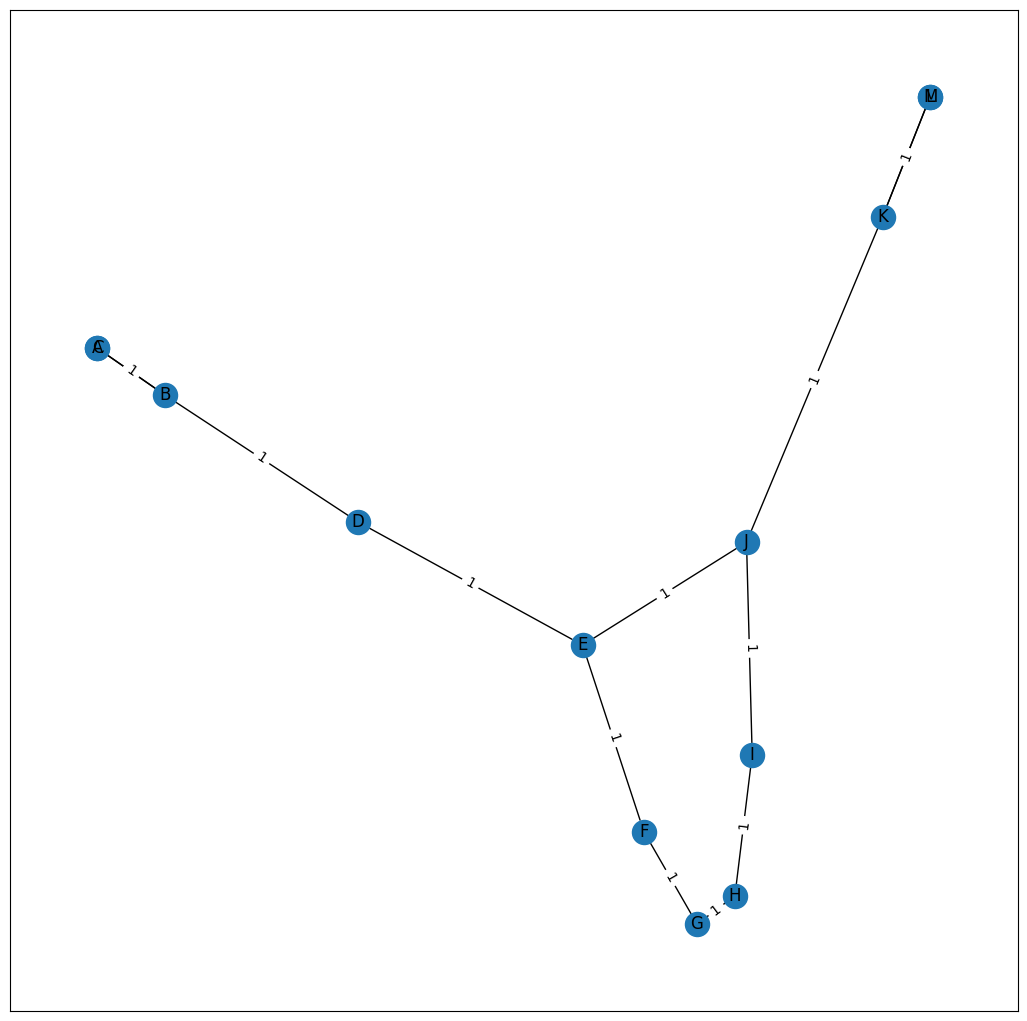

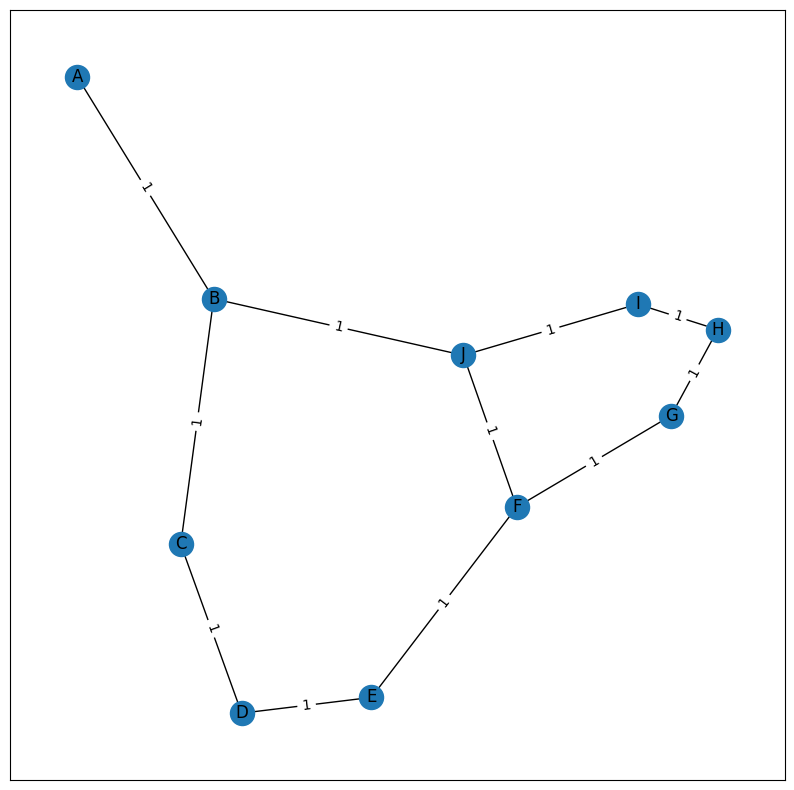

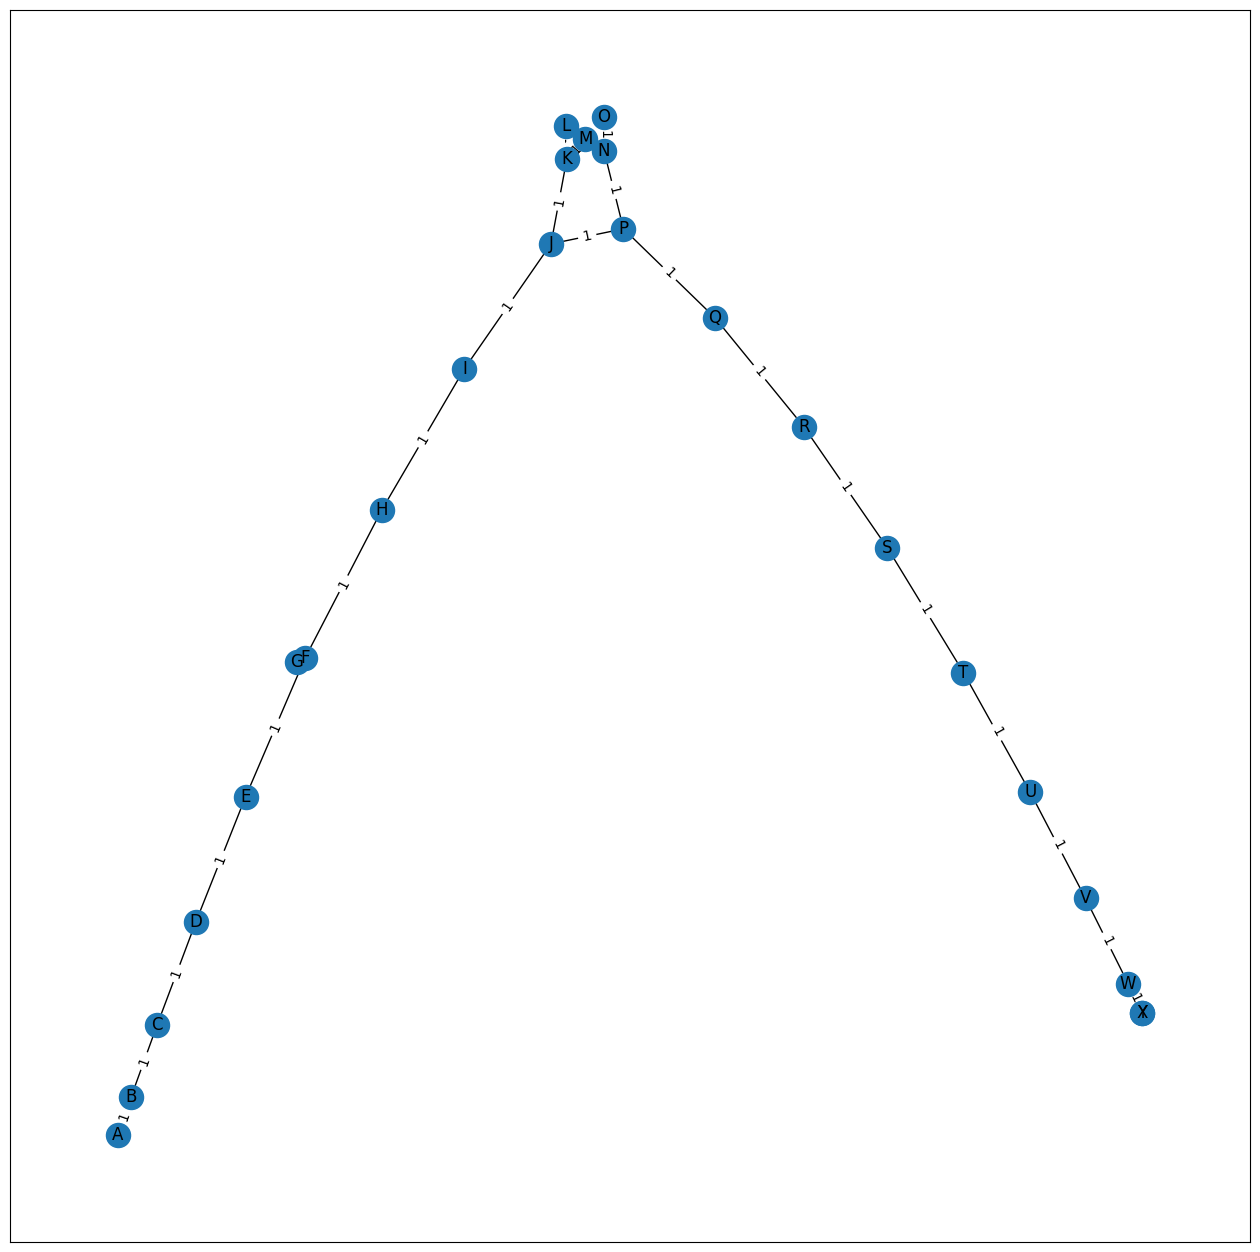

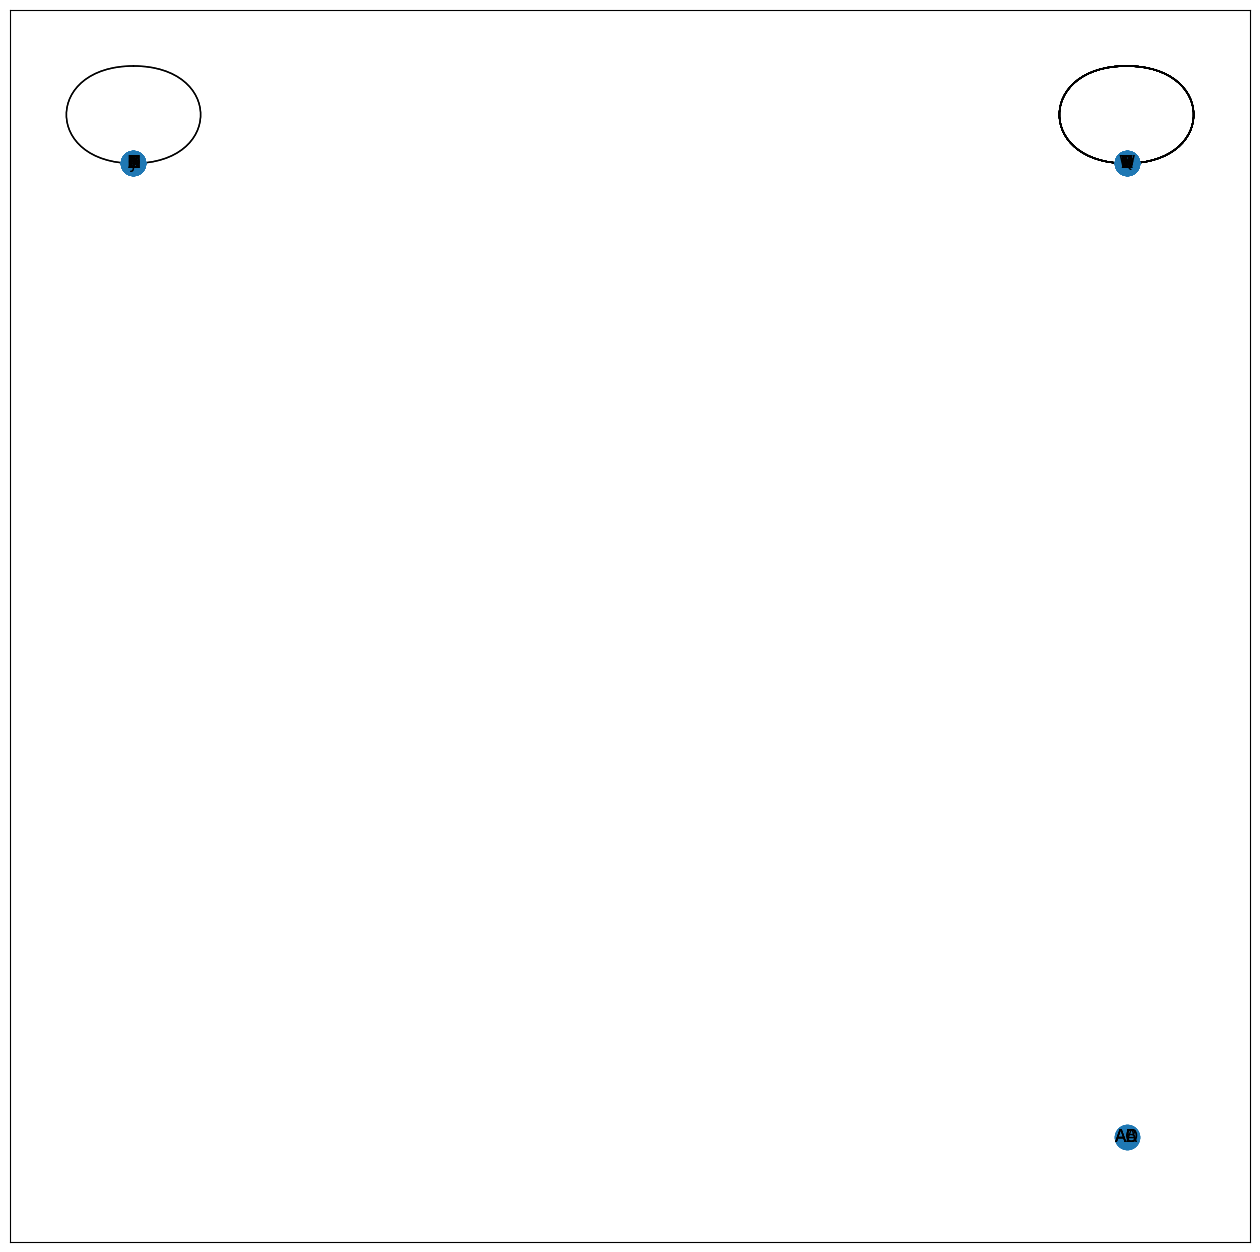

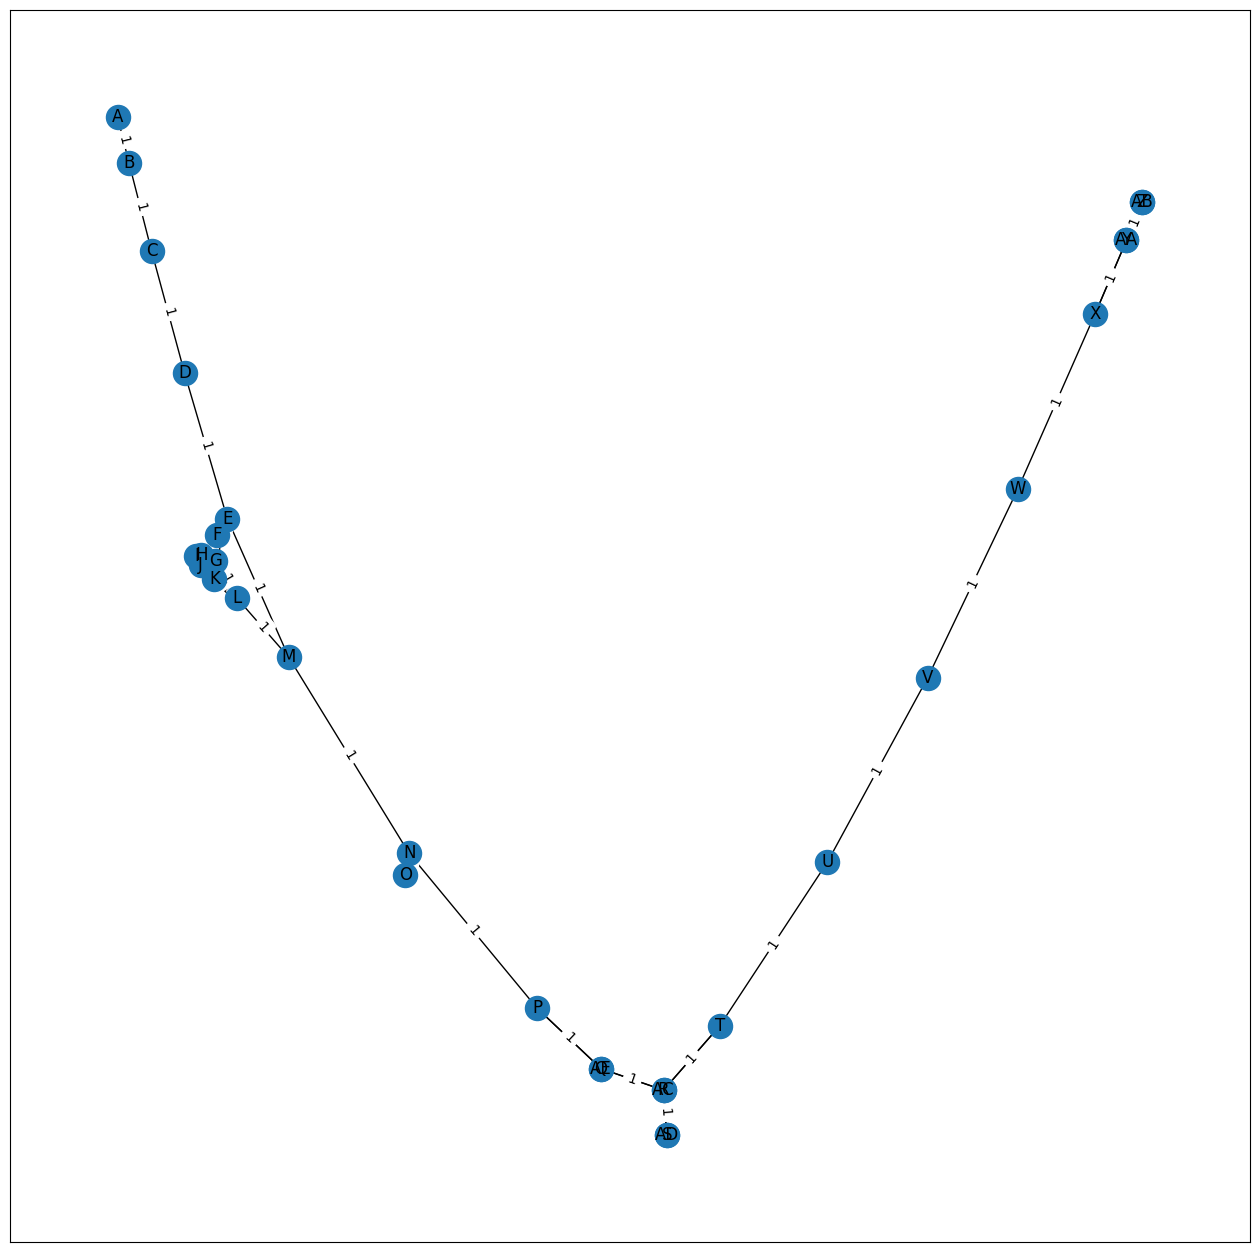

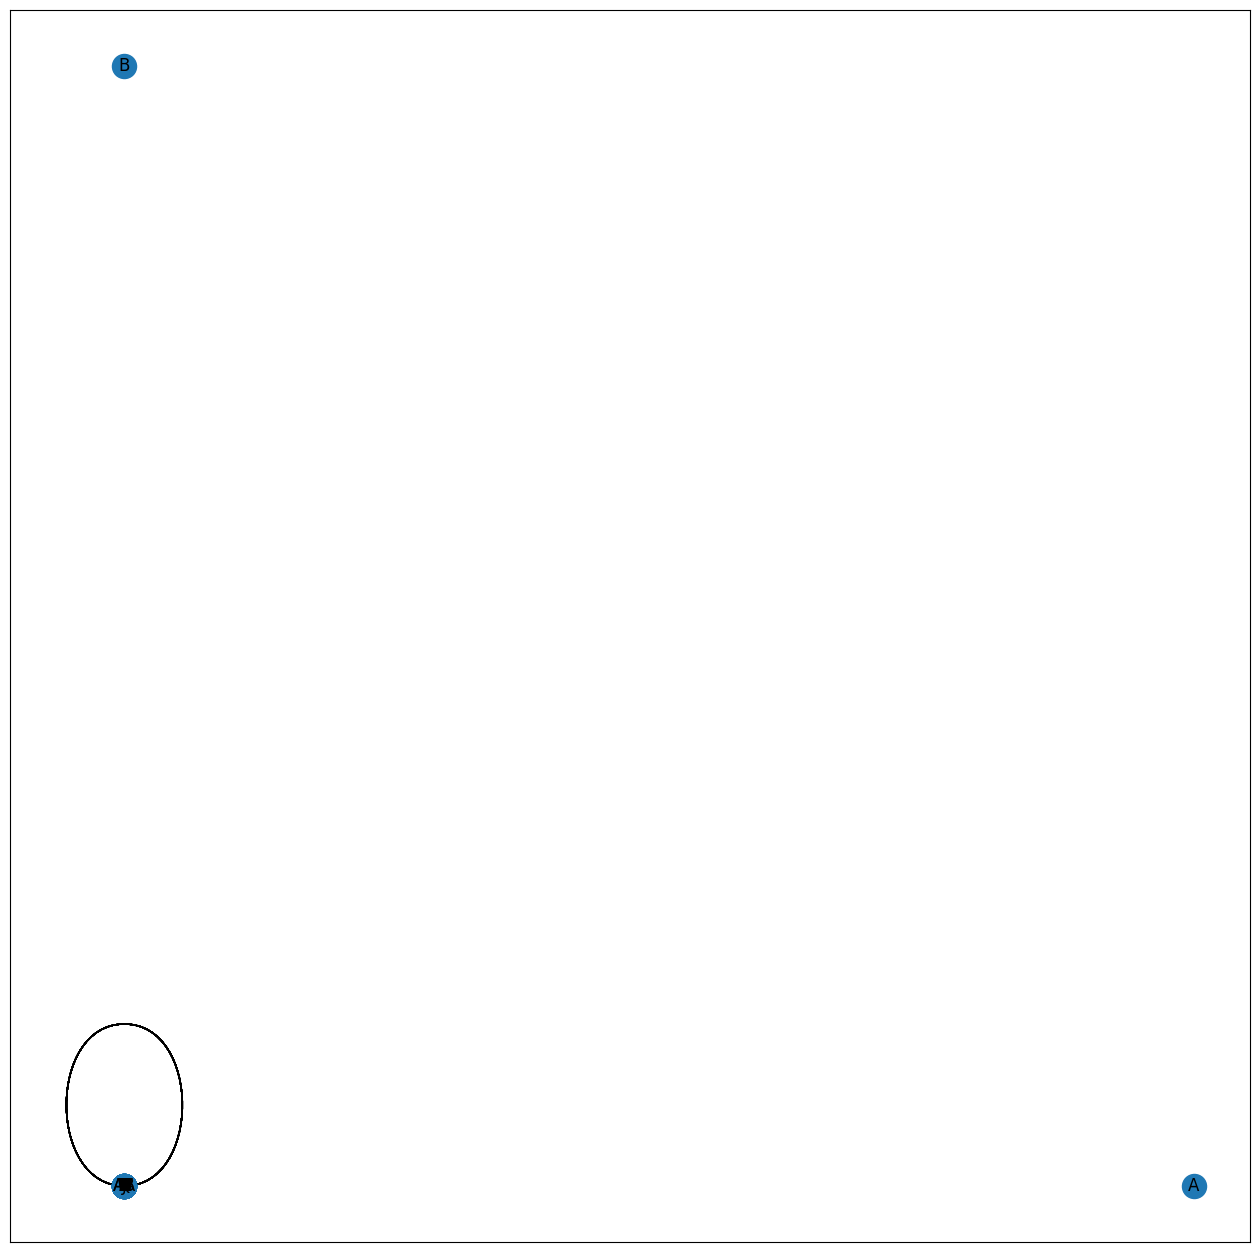

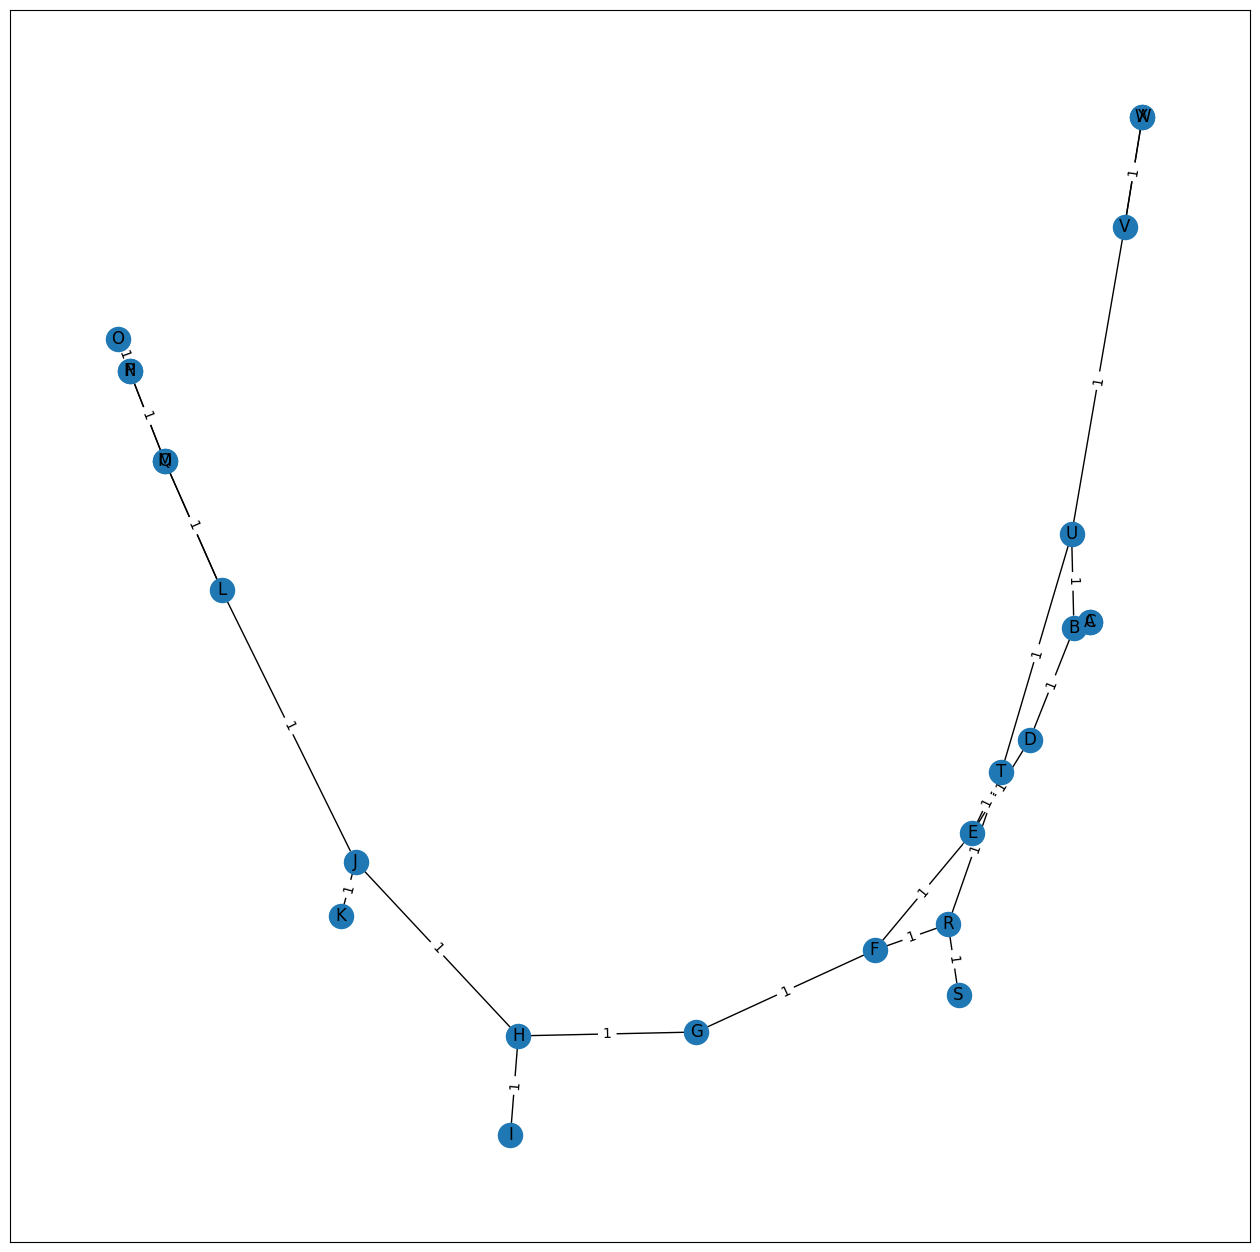

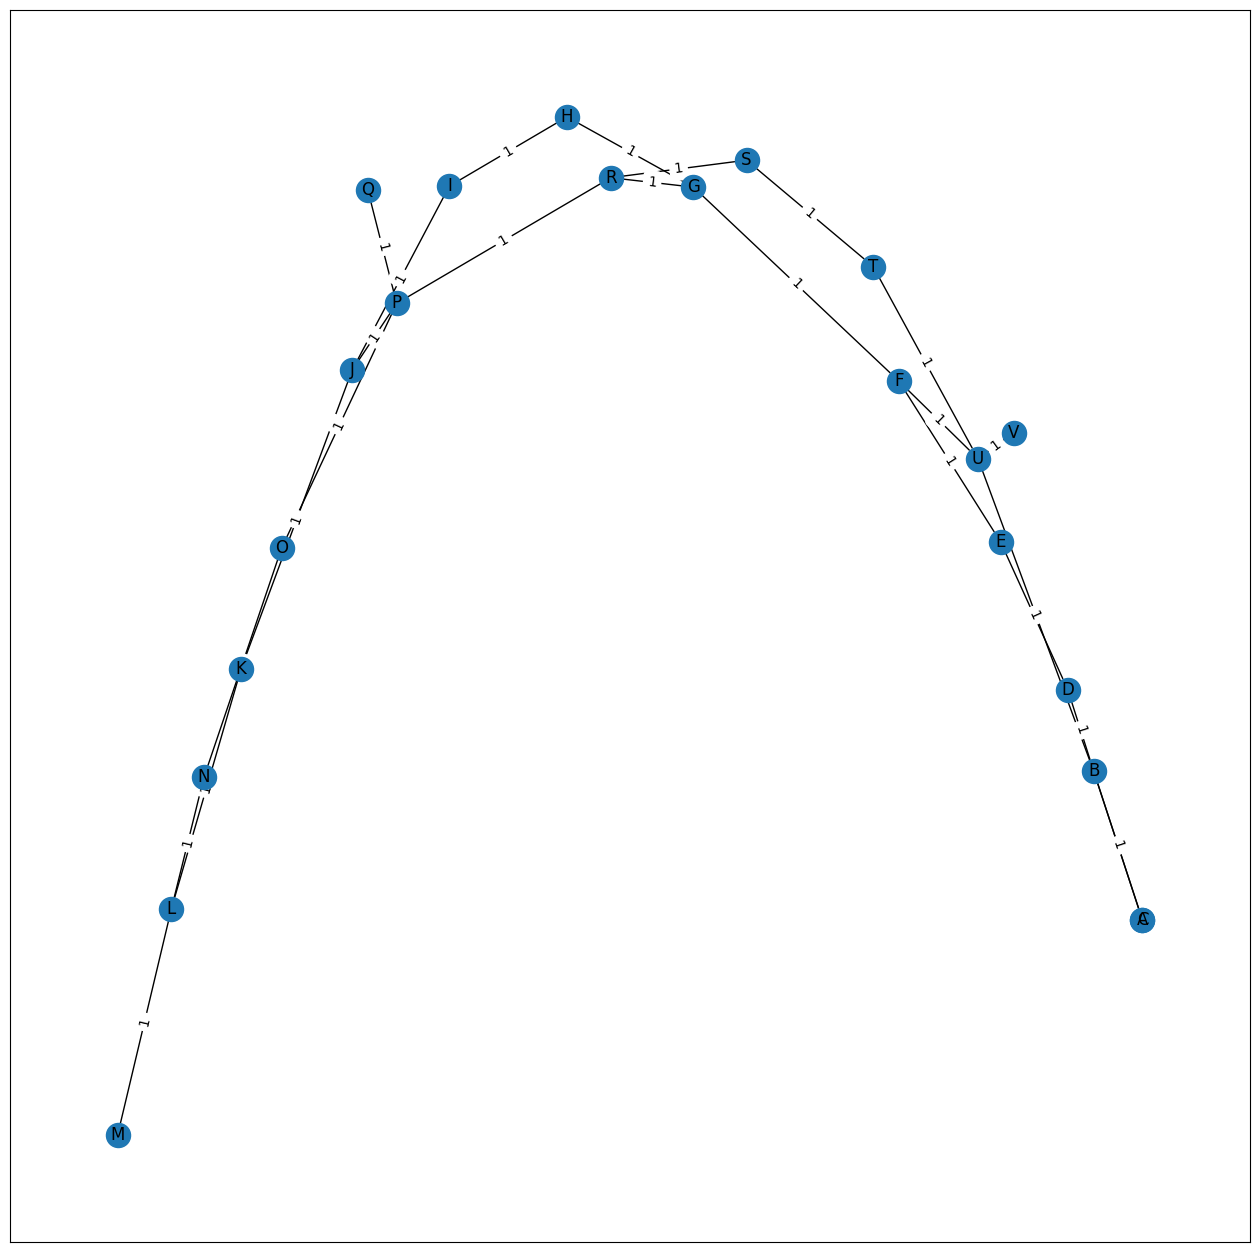

In [44]:
# Plot the graphs
for g in gs.graphs.values():
    g.plot()

## 6.Making feature vectors based on the frequency of the subgraphs

In [47]:
# Extract supgraph feature by counting supgraph k in each graph
import networkx as nx

# Initialize an empty list to store the cliques of each graph
cliques = []
num_cliques = []
# Iterate over each graph in the list
for graph in graphs:
    # Find all cliques in the current graph
    graph_cliques = list(nx.find_cliques(graph))
    # Add the cliques to the list
    cliques.append(graph_cliques)
    # Add the number of cliques to the list
    num_cliques.append(len(graph_cliques))

# Print the cliques
for i, graph_cliques in enumerate(cliques):
    print(f'Cliques for graph{i+1}: {graph_cliques}')

    

Cliques for graph1: [[0], [2, 1], [2, 3], [2, 4], [5, 4], [5, 6], [6, 8], [6, 7], [8, 9], [9, 10], [10, 19], [10, 11], [11, 12], [12, 13], [13, 14], [14, 19], [14, 15], [15, 16], [16, 17], [17, 18], [18, 19]]
Cliques for graph2: [[0, 1], [0, 2], [0, 7], [3, 2], [3, 4], [3, 5], [3, 6], [7, 8], [8, 9], [9, 10], [10, 11], [10, 15], [11, 12], [12, 13], [13, 16], [13, 14], [14, 15], [16, 17], [16, 20], [17, 18], [18, 19], [20, 21], [21, 22]]
Cliques for graph3: [[0, 1], [0, 5], [1, 2], [2, 3], [4, 8], [4, 3], [4, 5], [6, 5], [6, 7], [7, 8], [7, 9], [9, 10], [10, 11]]
Cliques for graph4: [[0, 1], [1, 2], [1, 12], [2, 3], [3, 4], [4, 12], [4, 5], [5, 10], [5, 6], [6, 7], [7, 8], [8, 9], [9, 10], [10, 11], [12, 13], [13, 14], [13, 15], [15, 16], [16, 24], [16, 17], [17, 18], [17, 23], [19, 18], [19, 20], [19, 21], [19, 22], [23, 24], [23, 22], [24, 25], [26, 27], [26, 28], [26, 22]]
Cliques for graph5: [[0, 1], [2, 1], [2, 42], [2, 3], [4, 3], [4, 5], [5, 40], [5, 6], [6, 8], [6, 7], [8, 9], [

## 7. Simple regressions based on graph features: cliques

In [48]:
print(num_cliques)

num_cliques_1 = np.array(num_cliques).reshape(-1, 1)

print(num_cliques_1)
print(num_cliques_1.shape)

[21, 23, 13, 32, 48, 42, 25, 31, 15, 30, 18, 24, 32, 37, 23, 35, 17, 29, 13, 11, 25, 31, 33, 30, 26, 25]
[[21]
 [23]
 [13]
 [32]
 [48]
 [42]
 [25]
 [31]
 [15]
 [30]
 [18]
 [24]
 [32]
 [37]
 [23]
 [35]
 [17]
 [29]
 [13]
 [11]
 [25]
 [31]
 [33]
 [30]
 [26]
 [25]]
(26, 1)


In [49]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from rdkit import Chem
import networkx as nx
from rdkit.Chem import rdmolops

# Load the CSV file
df = pd.read_csv('./graphdata/Molecular_Sample.csv')

label = df['p_np']
smiles = df['smiles']
print(label)
print(smiles)

0     1
1     1
2     0
3     1
4     1
5     1
6     1
7     1
8     1
9     0
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    0
18    0
19    0
20    0
21    0
22    0
23    0
24    0
25    0
Name: p_np, dtype: int64
0                      [Cl].CC(C)NCC(O)COc1cccc2ccccc12
1              C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl
2                                    c1cccn2c1nc(c2)CCN
3     Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)...
4     CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(...
5     CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@...
6                   Cn1c2CCC(Cn3ccnc3C)C(=O)c2c4ccccc14
7     COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@...
8                          NC(N)=NC(=O)c1nc(Cl)c(N)nc1N
9       OCC(C)(O)c1onc(c2ncn3c2CN(C)C(c4c3cccc4Cl)=O)n1
10        CC1=CN([C@H]2C[C@H](F)[C@@H](CO)O2)C(=O)NC1=O
11               CCC(=O)C(CC(C)N(C)C)(c1ccccc1)c2ccccc2
12    CCN1N=NN(CCN2CCC(CC2)(COC)N(C(=O)CC)c3ccccc3)C1=O
13    CN(C)C(=O)C(CCN1CCC(O)(CC1)c1ccc(

In [50]:
print(len(graphs))

26


In [51]:
# Initialize X and Y as empty lists
X = []
Y = []

# Iterate over each graph and its number of cliques
for graph, num_clique in zip(graphs, num_cliques):
    # Store the graph and its number of cliques in X
    X.append([smiles[graphs.index(graph)], num_clique])
    
    # Store the label of the current graph in Y
    Y.append(label[graphs.index(graph)])

In [52]:
print('X:', X)
print('Y:', Y)


X: [['[Cl].CC(C)NCC(O)COc1cccc2ccccc12', 21], ['C(=O)(OC(C)(C)C)CCCc1ccc(cc1)N(CCCl)CCCl', 23], ['c1cccn2c1nc(c2)CCN', 13], ['Cc1onc(c2ccccc2Cl)c1C(=O)N[C@H]3[C@H]4SC(C)(C)[C@@H](N4C3=O)C(O)=O', 32], ['CCN1CCN(C(=O)N[C@@H](C(=O)N[C@H]2[C@H]3SCC(=C(N3C2=O)C(O)=O)CSc4nnnn4C)c5ccc(O)cc5)C(=O)C1=O', 48], ['CN(C)[C@H]1[C@@H]2C[C@H]3C(=C(O)c4c(O)cccc4[C@@]3(C)O)C(=O)[C@]2(O)C(=O)\\C(=C(/O)NCN5CCCC5)C1=O', 42], ['Cn1c2CCC(Cn3ccnc3C)C(=O)c2c4ccccc14', 25], ['COc1ccc(cc1)[C@@H]2Sc3ccccc3N(CCN(C)C)C(=O)[C@@H]2OC(C)=O', 31], ['NC(N)=NC(=O)c1nc(Cl)c(N)nc1N', 15], ['OCC(C)(O)c1onc(c2ncn3c2CN(C)C(c4c3cccc4Cl)=O)n1', 30], ['CC1=CN([C@H]2C[C@H](F)[C@@H](CO)O2)C(=O)NC1=O', 18], ['CCC(=O)C(CC(C)N(C)C)(c1ccccc1)c2ccccc2', 24], ['CCN1N=NN(CCN2CCC(CC2)(COC)N(C(=O)CC)c3ccccc3)C1=O', 32], ['CN(C)C(=O)C(CCN1CCC(O)(CC1)c1ccc(Cl)cc1)(c1ccccc1)c1ccccc1', 37], ['CN1C2CCC1CC(C2)OC(=O)[C@H](CO)c3ccccc3', 23], ['COc1ccc(Cl)cc1C(=O)NCCc2ccc(cc2)[S](=O)(=O)NC(=O)NC3CCCCC3', 35], ['Nc1nnc(c(N)n1)c2cccc(Cl)c2Cl', 17], [

In [60]:
from sklearn import svm
regr = svm.SVR()

In [54]:
# Initialize X and Y as empty lists
X = []
Y = []

# Iterate over each graph and its number of cliques
for graph, num_clique in zip(graphs, num_cliques):
    # Store the number of cliques in X
    X.append([num_clique])
    
    # Store the label of the current graph in Y
    Y.append(label[graphs.index(graph)])

# Convert X and Y to numpy arrays
X = np.array(X)
Y = np.array(Y)

# Fit the model
regr.fit(X, Y)

SVR()

In [55]:
print('X:', X)
print('Y:', Y)

X: [[21]
 [23]
 [13]
 [32]
 [48]
 [42]
 [25]
 [31]
 [15]
 [30]
 [18]
 [24]
 [32]
 [37]
 [23]
 [35]
 [17]
 [29]
 [13]
 [11]
 [25]
 [31]
 [33]
 [30]
 [26]
 [25]]
Y: [1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 0 0 0 0 0 0 0 0 0]


In [70]:
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=.2)

svr = SVR(kernel='rbf', gamma='auto')
svr.fit(xtrain, ytrain)

SVR(gamma='auto')

MSE:  0.3010325911731699


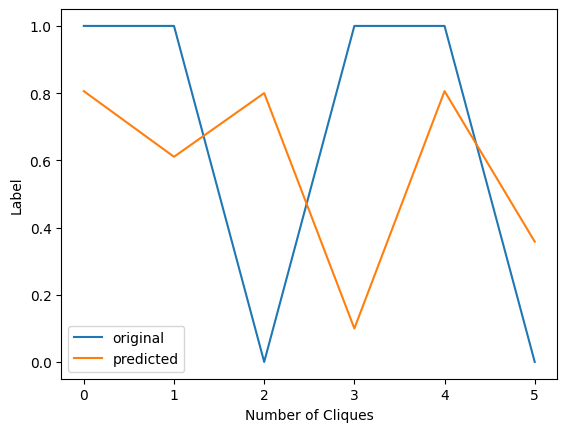

In [71]:
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error

ypred = svr.predict(xtest)

mse = mean_squared_error(ytest, ypred)
print("MSE: ", mse)

x_ax = range(len(ytest))
plt.plot(x_ax, ytest, label='original')
plt.plot(x_ax, ypred, label="predicted")
plt.xlabel('Number of Cliques')
plt.ylabel('Label')
plt.title("")
plt.legend()
plt.show()
